# Analisis de los Datos Secundarios

Analizaremos y haremos gráficos sobre la cuestión de cada dataset con el fin de obtener información para saber si el funcionamiento de las ciclovías es el correcto en función de los accidentes viales, entre otros.


## Datos de la Ciudad de Buenos Aires



### Ciclovias existentes

Secretaria de Transporte y Obras Públicas. Jefatura de Gabinete de Ministros (10 de mayo de 2024). Ciclovías. BA Data. Recuperado el día 11 de julio de 2024. https://data.buenosaires.gob.ar/dataset/ciclovias

In [26]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Cargamos el Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/CABA/Ciclovias/ciclovias_WGS84.csv", delimiter=';', encoding='utf-8')

In [28]:
data.head()

,ID,NOMBRE,TIPO_C,COMUNA,BARRIO,CATEGORIA,TIPOLOGIA,LONG,FECHA,LIM_COM,LIM_BARRIO
0,0,"GONZALEZ, ELPIDIO",CALLE,COMUNA 10,MONTECASTRO,CICLOVIA,BIDIRECCIONAL,"1,57445561287",2017,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
1,1,DEAN FUNES,CALLE,COMUNA 3,SAN CRISTOBAL,CICLOVIA,BIDIRECCIONAL,"0,78632389654",2015,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
2,2,"GARCIA, JUAN AGUSTIN",CALLE,COMUNA 11,VILLA SANTA RITA,CICLOVIA,BIDIRECCIONAL,"1,37277552386",2018,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
3,3,BALBASTRO,CALLE,COMUNA 7,FLORES,CICLOVIA,BIDIRECCIONAL,"0,56114149481",2017,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
4,4,IBERA,CALLE,COMUNA 13,NU├æEZ,CICLOVIA,BIDIRECCIONAL,"0,70160471745",2017,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          578 non-null    int64 
 1   NOMBRE      574 non-null    object
 2   TIPO_C      551 non-null    object
 3   COMUNA      567 non-null    object
 4   BARRIO      551 non-null    object
 5   CATEGORIA   551 non-null    object
 6   TIPOLOGIA   567 non-null    object
 7   LONG        578 non-null    object
 8   FECHA       578 non-null    int64 
 9   LIM_COM     551 non-null    object
 10  LIM_BARRIO  551 non-null    object
dtypes: int64(2), object(9)
memory usage: 49.8+ KB


In [30]:
print("\nResumen de los datos:")
data.describe(include='all')


Resumen de los datos:


,ID,NOMBRE,TIPO_C,COMUNA,BARRIO,CATEGORIA,TIPOLOGIA,LONG,FECHA,LIM_COM,LIM_BARRIO
count,578.000000,574,551,567,551,551,567,578,578.000000,551,551
unique,NaN,284,4,21,46,2,7,572,NaN,18,32
top,NaN,DEL LIBERTADOR AV.,CALLE,COMUNA 1,PALERMO,CICLOVIA,BIDIRECCIONAL,"0,00000000000",NaN,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
freq,NaN,18,414,91,51,442,512,7,NaN,521,510
mean,231.911765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.700692,NaN,NaN
std,160.571167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.860034,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN
25%,83.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
50%,227.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN
75%,371.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN


In [31]:
data.shape

(578, 11)

In [32]:
#Eliminando filas o columnas que contegan valores faltantes
data.dropna(inplace=True)

# Reemplaza los valores faltantes
data.fillna(value=0, inplace=True)

In [33]:
# Removiendo las filas duplicadas
data.drop_duplicates(inplace=True)

In [34]:
# Estandarizando los valores de comuna
data['COMUNA'] = data['COMUNA'].replace('14', 'COMUNA 14')

# Distribución de las ciclovías por comuna
comunas_count = data['COMUNA'].value_counts()
print("\nCiclovías por comuna:")
comunas_count


Ciclovías por comuna:


,count
COMUNA,
COMUNA 1,91
COMUNA 13,77
COMUNA 4,56
COMUNA 14,51
COMUNA 15,40
COMUNA 3,35
COMUNA 6,35
COMUNA 5,33
COMUNA 7,32


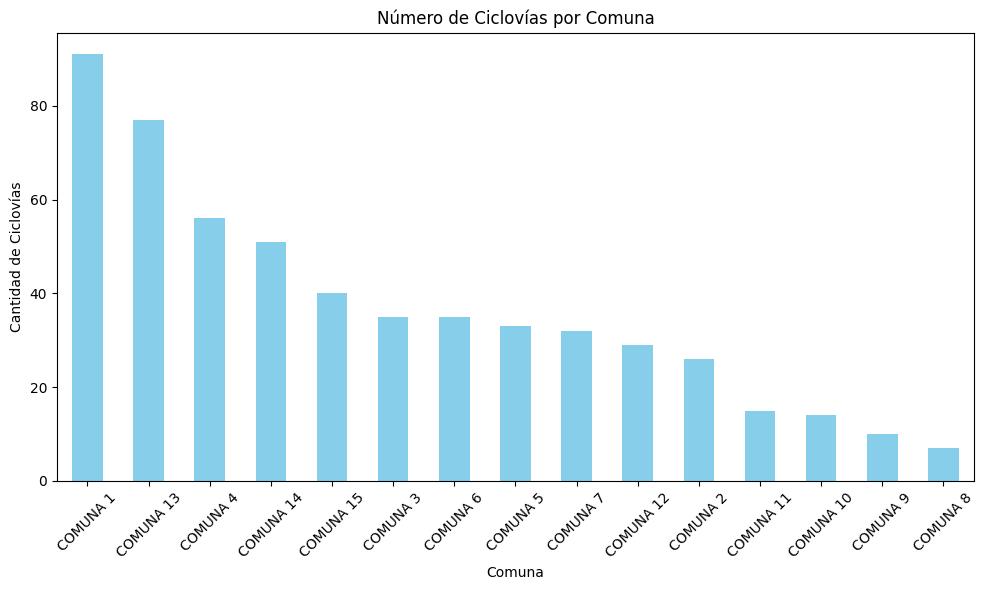

In [35]:
# Gráfico de Barra: número de ciclovías por comuna
plt.figure(figsize=(10, 6))
comunas_count.plot(kind='bar', color='skyblue')
plt.title('Número de Ciclovías por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Calcular la longitud total de ciclovías por comuna
data['LONG'] = data['LONG'].str.replace(',', '.').astype(float)  # Convertir a número decimal
longitudes_por_comuna = data.groupby('COMUNA')['LONG'].sum()
print("\nLongitud total de ciclovías por comuna:")
longitudes_por_comuna


Longitud total de ciclovías por comuna:


,LONG
COMUNA,
COMUNA 1,38.171502
COMUNA 10,11.879022
COMUNA 11,9.945741
COMUNA 12,19.230081
COMUNA 13,30.798639
COMUNA 14,30.925652
COMUNA 15,22.415100
COMUNA 2,11.823711
COMUNA 3,20.969688


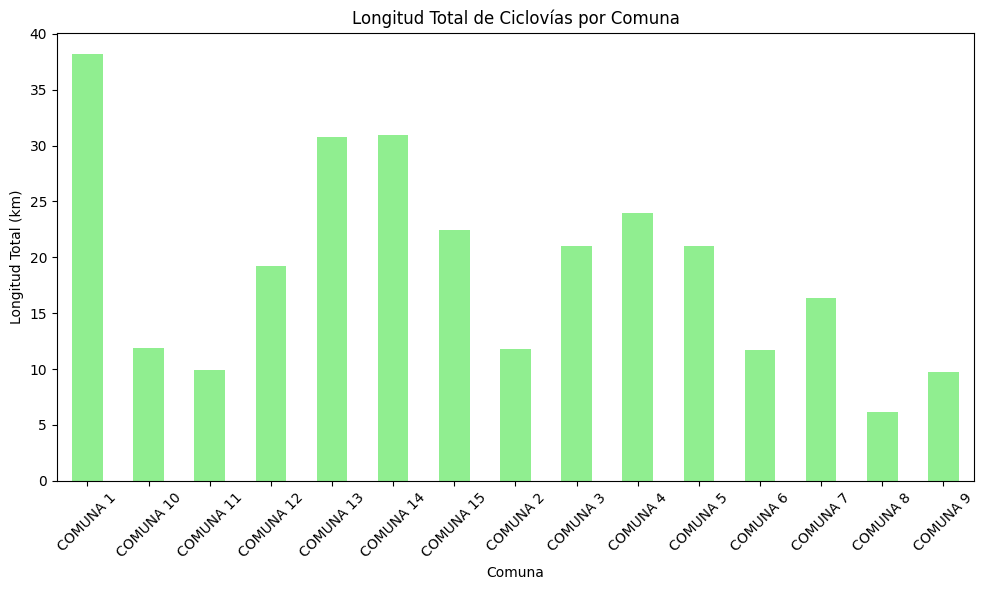

In [37]:
# Gráfico de barra: longitud total de ciclovías por comuna
plt.figure(figsize=(10, 6))
longitudes_por_comuna.plot(kind='bar', color='lightgreen')
plt.title('Longitud Total de Ciclovías por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Longitud Total (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Distribución de Tipo de Ciclovias por comuna
tipo_ciclovias_por_comuna = data.groupby(['COMUNA', 'TIPOLOGIA']).size().unstack(fill_value=0)
print("\nDistribución de Tipos de Ciclovías por Comuna:")
tipo_ciclovias_por_comuna


Distribución de Tipos de Ciclovías por Comuna:


TIPOLOGIA,BIDIRECCIONA,BIDIRECCIONAL,BIDIRRECCIONAL,ESTACIONAMIENTO PARALELO,UNIDIRECCIONAL
COMUNA,,,,,
COMUNA 1,1,83,0,0,7
COMUNA 10,0,13,0,1,0
COMUNA 11,0,14,0,1,0
COMUNA 12,0,29,0,0,0
COMUNA 13,0,75,0,2,0
COMUNA 14,0,48,3,0,0
COMUNA 15,0,31,0,1,8
COMUNA 2,0,26,0,0,0
COMUNA 3,0,32,0,0,3


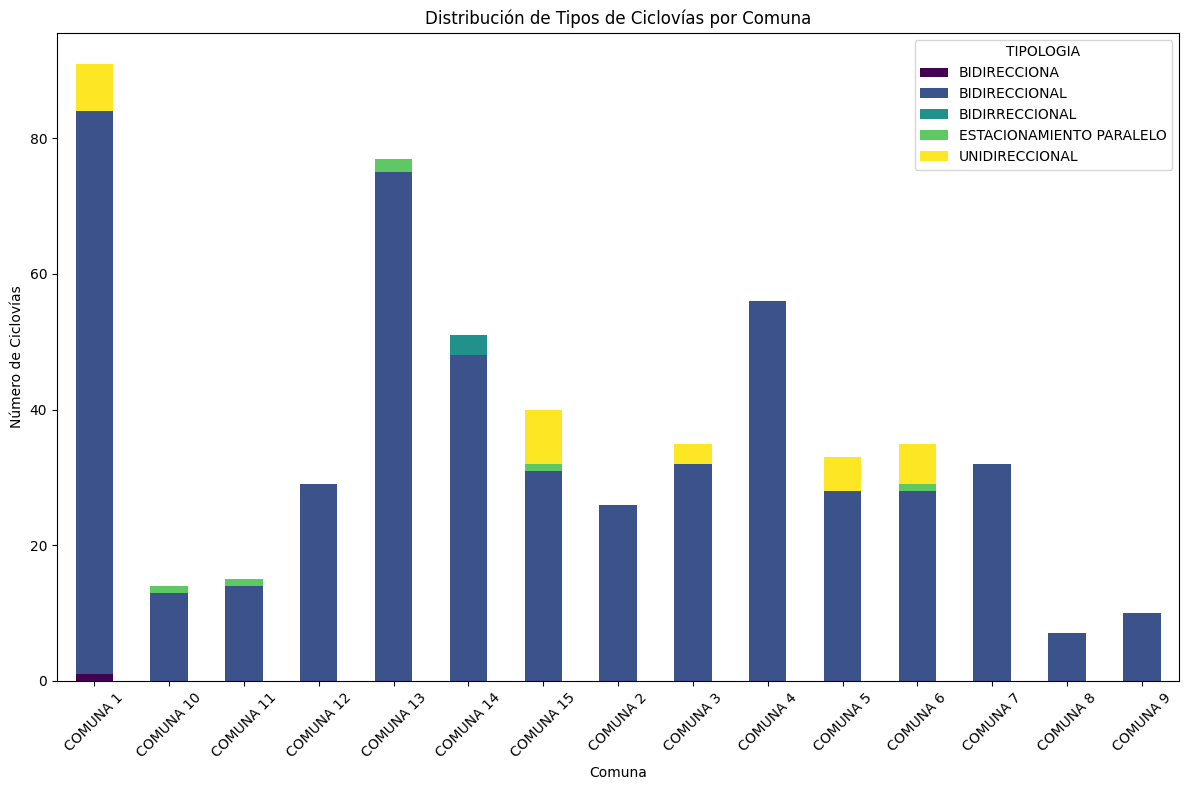

In [39]:
# Gráfico de barra apilado: Tipos de Ciclovías por Comuna
tipo_ciclovias_por_comuna.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribución de Tipos de Ciclovías por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Evolución de la Construcción de Ciclovías a lo Largo del Tiempo
data['FECHA'] = pd.to_numeric(data['FECHA'], errors='coerce')  # Convertir a números
ciclovias_por_anio = data['FECHA'].value_counts().sort_index()
print("\nEvolución de la Construcción de Ciclovías a lo Largo del Tiempo:")
ciclovias_por_anio


Evolución de la Construcción de Ciclovías a lo Largo del Tiempo:


,count
FECHA,
2010,70
2011,48
2012,40
2013,29
2014,47
2015,52
2016,16
2017,69
2018,47


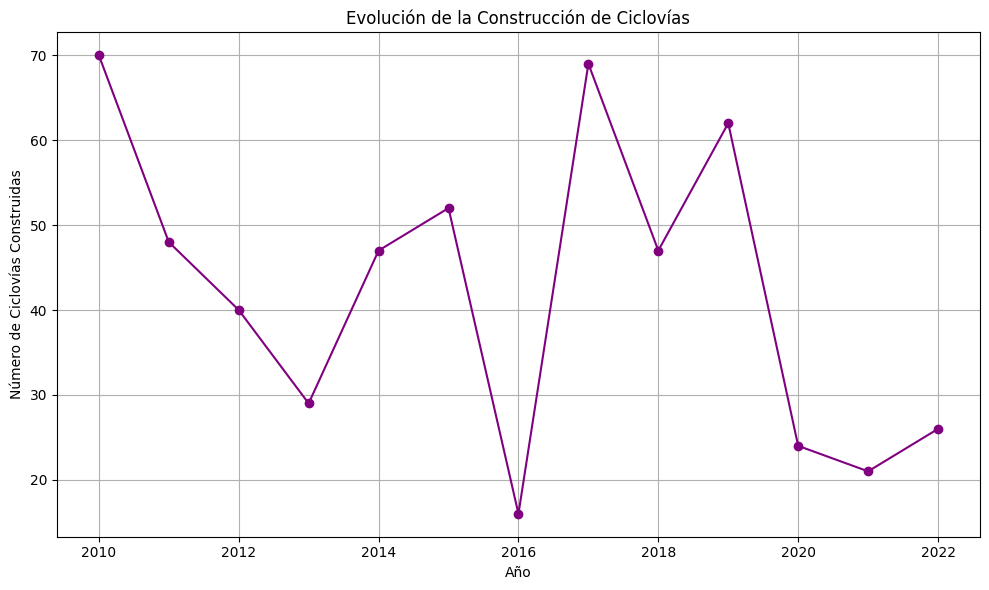

In [41]:
# Gráfico de Evolución: Ciclovías Construidas por Año
plt.figure(figsize=(10, 6))
ciclovias_por_anio.plot(kind='line', marker='o', color='purple')
plt.title('Evolución de la Construcción de Ciclovías')
plt.xlabel('Año')
plt.ylabel('Número de Ciclovías Construidas')
plt.grid(True)
plt.tight_layout()
plt.show()

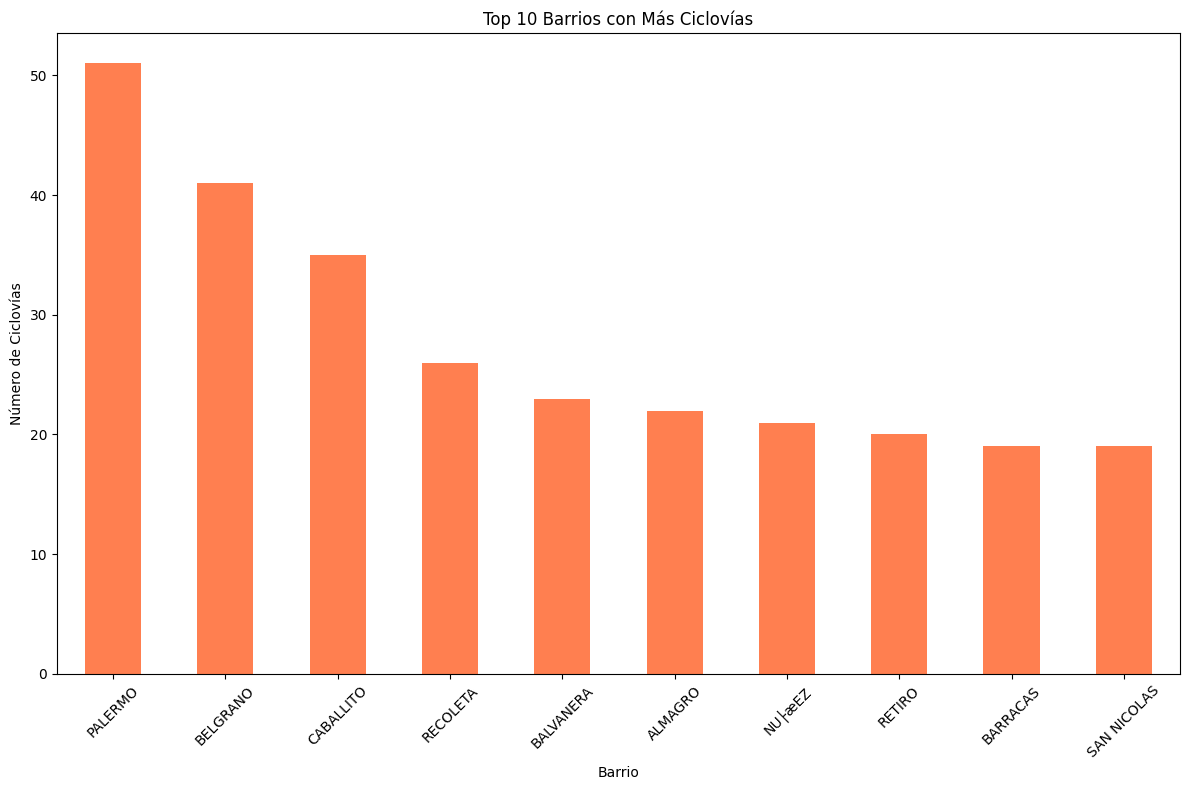

In [42]:
# Gráfico de barra: Top 10 Barrios con Más Ciclovías
ciclovias_por_barrio = data['BARRIO'].value_counts()

plt.figure(figsize=(12, 8))
ciclovias_por_barrio.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Barrios con Más Ciclovías')
plt.xlabel('Barrio')
plt.ylabel('Número de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Longitud Promedio de Ciclovías por Tipo
longitud_promedio_por_tipo = data.groupby('TIPOLOGIA')['LONG'].mean()
print("\nLongitud Promedio de Ciclovías por Tipo:")
longitud_promedio_por_tipo


Longitud Promedio de Ciclovías por Tipo:


,LONG
TIPOLOGIA,
BIDIRECCIONA,0.037071
BIDIRECCIONAL,0.505931
BIDIRRECCIONAL,0.200794
ESTACIONAMIENTO PARALELO,0.537703
UNIDIRECCIONAL,0.767102


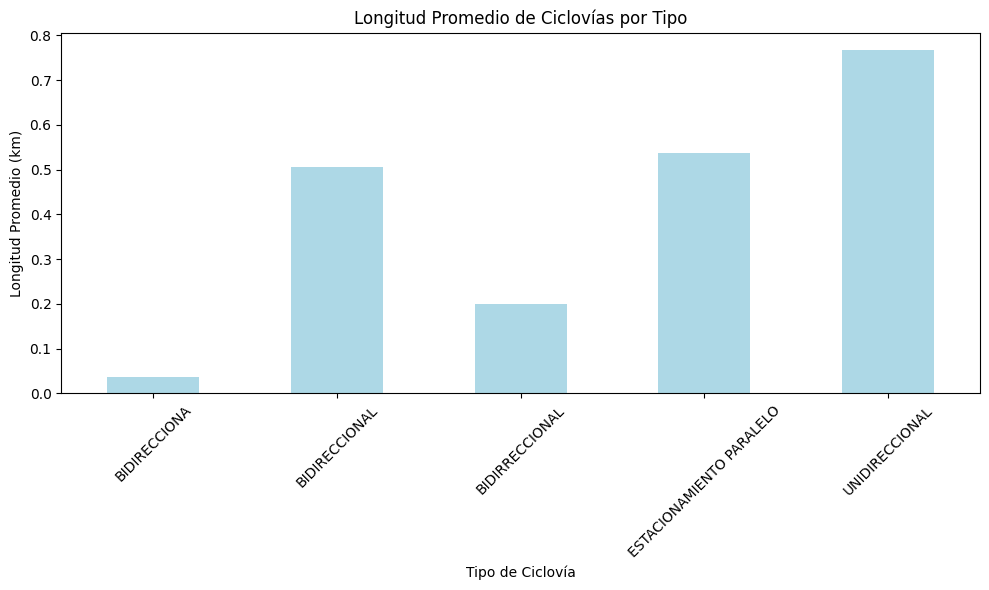

In [44]:
# Gráfico de Barra: Longitud Promedio de Ciclovías por Tipo
plt.figure(figsize=(10, 6))
longitud_promedio_por_tipo.plot(kind='bar', color='lightblue')
plt.title('Longitud Promedio de Ciclovías por Tipo')
plt.xlabel('Tipo de Ciclovía')
plt.ylabel('Longitud Promedio (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Ciclovias por tipo de calle
ciclovias_por_tipo = data['TIPO_C'].value_counts()
print("Tipos de Calle: ")
ciclovias_por_tipo

Tipos de Calle: 


,count
TIPO_C,
CALLE,414
AVENIDA,118
SENDERO,16
PUENTE,3


In [46]:
# Longitud Total de Ciclovías por Tipo de calle
longitud_por_tipo = data.groupby('TIPO_C')['LONG'].sum()
print("Longitud Total de Ciclovías por Tipo de Vía:")
longitud_por_tipo

Longitud Total de Ciclovías por Tipo de Vía:


,LONG
TIPO_C,
AVENIDA,64.910468
CALLE,215.148618
PUENTE,0.818018
SENDERO,4.271113


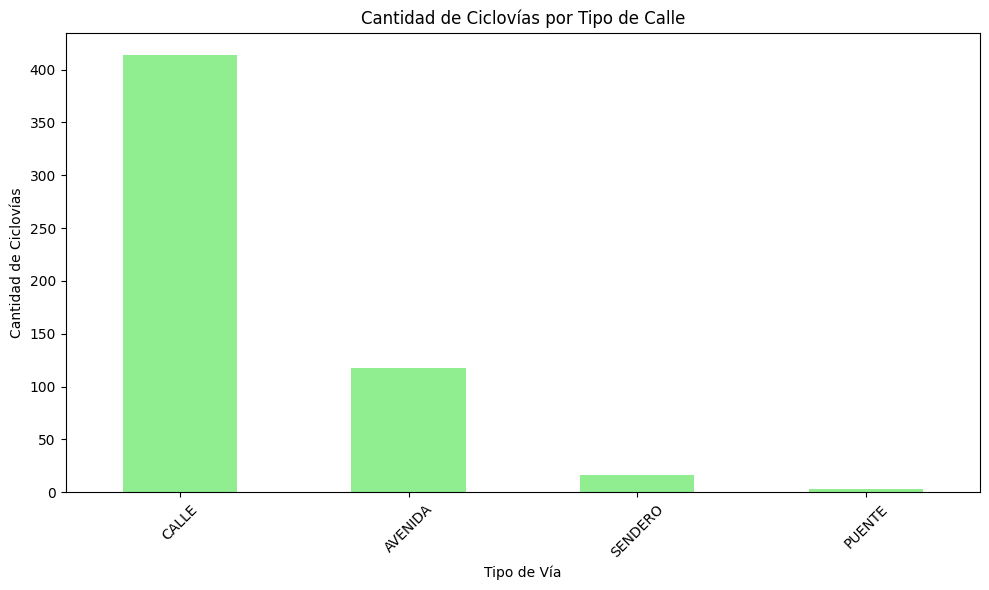

In [47]:
# Gráfico de Barra: Cantidad de Ciclovías por Tipo de Calle
plt.figure(figsize=(10, 6))
ciclovias_por_tipo.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Ciclovías por Tipo de Calle')
plt.xlabel('Tipo de Vía')
plt.ylabel('Cantidad de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Siniestros Viales

Secretaría de Transporte - Subsecretaría de Planificación de la Movilidad - Observatorio de Movilidad y Seguridad Vial (28 de mayo de 2021). Siniestro Viales. BA Data. Recuperado el día 29 de agosto de 2024. https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales



In [48]:
df_hechos = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/CABA/Siniestros-Viales/siniestros_viales_hechos.csv", delimiter=';', encoding='latin-1')
df_victimas = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/CABA/Siniestros-Viales/siniestros_viales_victimas.csv", delimiter=';', encoding='latin-1')

<ipython-input-48-921361d330cf>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hechos = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/CABA/Siniestros-Viales/siniestros_viales_hechos.csv", delimiter=';', encoding='latin-1')


In [49]:
df_hechos.head()

,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,direccion_normalizada,calle,...,comuna,tipo_de_calle,geocodificacion_caba,longitud,latitud,participantes,victima,contraparte,gravedad,tipo_de_dato
0,LC-2019-0008283,2,2019-01-04,2019,1,4,17:53:00,17,SD,NaN,...,SD,SD,SD,SD,SD,AUTO-SD,AUTO,SD,SD,definitivo
1,LC-2019-0007634,1,2019-01-04,2019,1,4,14:50:00,14,SD,NaN,...,SD,SD,SD,SD,SD,MOTO-SD,MOTO,SD,SD,definitivo
2,LC-2019-0008974,1,2019-01-05,2019,1,5,09:30:00,9,SD,NaN,...,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo
3,LC-2019-0010983,2,2019-01-06,2019,1,6,22:20:00,22,SD,NaN,...,SD,SD,SD,SD,SD,AUTO-SD,AUTO,SD,SD,definitivo
4,LC-2019-0011092,1,2019-01-07,2019,1,7,03:50:00,3,SD,NaN,...,SD,SD,SD,SD,SD,PEATON-SD,PEATON,SD,SD,definitivo


In [50]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44012 entries, 0 to 44011
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_hecho               44012 non-null  object
 1   n_victimas             44012 non-null  int64 
 2   fecha                  44012 non-null  object
 3   aaaa                   44012 non-null  int64 
 4   mm                     44012 non-null  int64 
 5   dd                     44012 non-null  int64 
 6   hora                   44012 non-null  object
 7   hh                     44012 non-null  object
 8   direccion_normalizada  44012 non-null  object
 9   calle                  33111 non-null  object
 10  altura                 32665 non-null  object
 11  cruce                  29509 non-null  object
 12  otra_direccion         44012 non-null  object
 13  comuna                 44012 non-null  object
 14  tipo_de_calle          44012 non-null  object
 15  geocodificacion_cab

In [51]:
print(df_hechos.shape)
print("\nResumen de los datos:")
df_hechos.describe(include='all')

(44012, 23)

Resumen de los datos:


,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,direccion_normalizada,calle,...,comuna,tipo_de_calle,geocodificacion_caba,longitud,latitud,participantes,victima,contraparte,gravedad,tipo_de_dato
count,44012,44012.000000,44012,44012.000000,44012.000000,44012.000000,44012,44012,44012,33111,...,44012.0,44012,44012,43796,43796,44012,44012,44012,44012,44012
unique,44012,NaN,1826,NaN,NaN,NaN,2604,26,17538,1248,...,20.0,8,26795,23983,23225,199,21,23,5,2
top,LC-2019-0008283,NaN,2021-12-17,NaN,NaN,NaN,18:00:00,17,SD,"PAZ, GRAL. AV.",...,1.0,AVENIDA,SD,SD,SD,SD-SD,SD,SD,SD,definitivo
freq,1,NaN,55,NaN,NaN,NaN,590,3121,11735,1365,...,4767.0,17807,1766,1542,1542,13022,13381,19535,33886,33673
mean,NaN,1.153185,NaN,2021.091952,6.672067,15.486367,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.565237,NaN,1.489238,3.422118,8.752242,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,2019.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,2020.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2021.000000,7.000000,15.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,2022.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_victimas.head()

,id_hecho,fecha,aaaa,victima,sexo_victima,edad_victima,gravedad,rol_victima,fecha_fallemiento,tipo_de_dato
0,LC-2019-0000053,2019-01-01,2019,sd,Varon,57,SD,SD,NaN,definitivo
1,LC-2019-0000063,2019-01-01,2019,sd,SD,SD,SD,SD,NaN,definitivo
2,LC-2019-0000079,2019-01-01,2019,sd,Varon,SD,SD,SD,NaN,definitivo
3,LC-2019-0000082,2019-01-01,2019,sd,Varon,45,SD,SD,NaN,definitivo
4,LC-2019-0000082,2019-01-01,2019,sd,Mujer,45,SD,SD,NaN,definitivo


In [53]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50754 entries, 0 to 50753
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_hecho           50754 non-null  object
 1   fecha              50754 non-null  object
 2   aaaa               50754 non-null  int64 
 3   victima            50754 non-null  object
 4   sexo_victima       50754 non-null  object
 5   edad_victima       50754 non-null  object
 6   gravedad           50754 non-null  object
 7   rol_victima        50754 non-null  object
 8   fecha_fallemiento  497 non-null    object
 9   tipo_de_dato       50754 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [54]:
print(df_victimas.shape)
print("\nResumen de los datos:")
df_victimas.describe(include='all')

(50754, 10)

Resumen de los datos:


,id_hecho,fecha,aaaa,victima,sexo_victima,edad_victima,gravedad,rol_victima,fecha_fallemiento,tipo_de_dato
count,50754,50754,50754.000000,50754,50754,50754,50754,50754,497,50754
unique,44012,1827,NaN,21,10,103,5,6,429,2
top,LC-2022-0166804,SD,NaN,MOTO,Varon,SD,SD,SD,12/5/2022,definitivo
freq,18,736,NaN,13222,22247,14609,32785,50259,4,38627
mean,NaN,NaN,2021.086712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.496549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Filtrar filas donde 'participante' o 'victima' contengan la palabra "bicicleta" (insensible a mayúsculas)
hechos_bicicletas = df_hechos[(df_hechos['participantes'].str.contains('bicicleta', case=False, na=False)) |
            (df_hechos['victima'].str.contains('bicicleta', case=False, na=False))]

In [56]:
print(hechos_bicicletas.shape)
hechos_bicicletas.head()

(4484, 23)


,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,direccion_normalizada,calle,...,comuna,tipo_de_calle,geocodificacion_caba,longitud,latitud,participantes,victima,contraparte,gravedad,tipo_de_dato
2,LC-2019-0008974,1,2019-01-05,2019,1,5,09:30:00,9,SD,NaN,...,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo
52,LC-2019-0089490,1,2019-02-11,2019,2,11,17:30:00,17,SD,NaN,...,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo
73,LC-2019-0104014,1,2019-02-18,2019,2,18,07:30:00,7,SD,NaN,...,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo
89,LC-2019-0119434,1,2019-02-25,2019,2,25,09:45:00,9,SD,NaN,...,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo
109,LC-2019-0135021,1,2019-03-04,2019,3,4,21:00:00,21,SD,NaN,...,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo


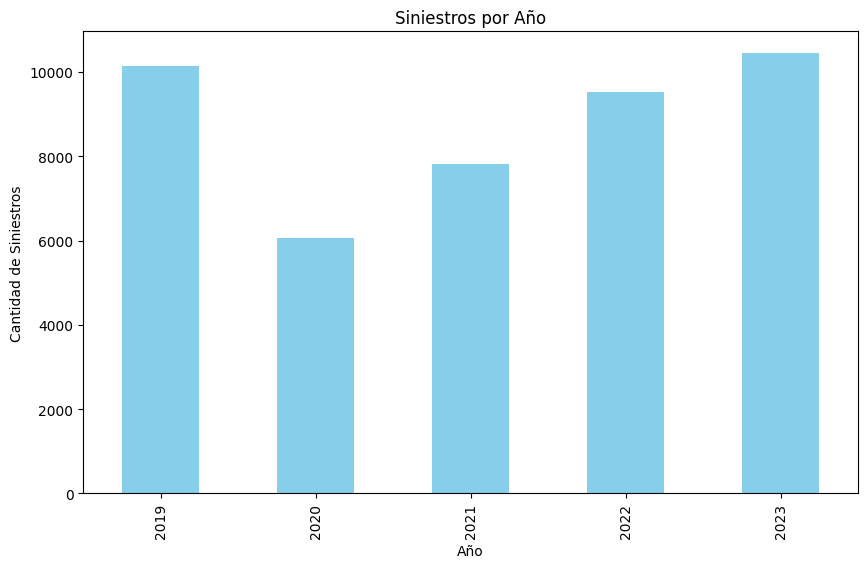

In [57]:
# Distribución temporal de los siniestros
df_hechos['fecha'] = pd.to_datetime(df_hechos['fecha'], errors='coerce')
df_hechos['año'] = df_hechos['fecha'].dt.year
siniestros_por_año = df_hechos.groupby('año').size()

# Gráfico de barra: Siniestros por año
plt.figure(figsize=(10, 6))
siniestros_por_año.plot(kind='bar', color='skyblue')
plt.title('Siniestros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Siniestros Grave o Mortal con Bicicletas gravedad
GRAVE     82
MORTAL    35
Name: count, dtype: int64


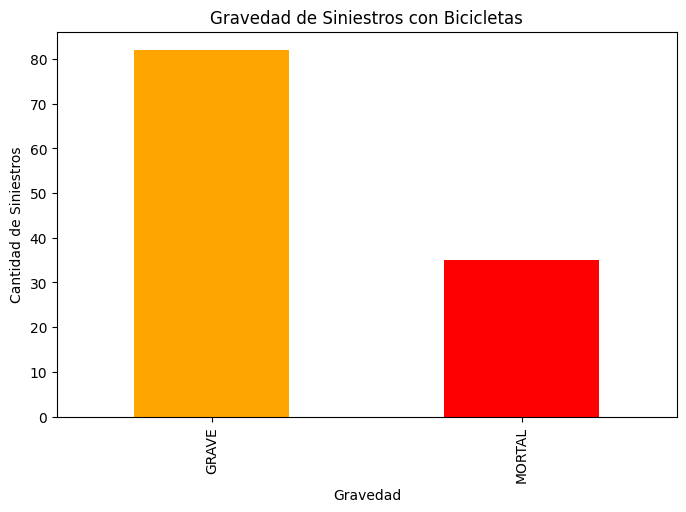

In [58]:
# Filtrar siniestros con bicicletas y gravedad
hechos_bicicletas = hechos_bicicletas[hechos_bicicletas['gravedad'].isin(['GRAVE', 'MORTAL'])]

# Contar la cantidad de siniestros graves o fatales
gravedad_counts = hechos_bicicletas['gravedad'].value_counts()
print("Siniestros Grave o Mortal con Bicicletas", gravedad_counts)

# Gráfico: Gravedad de Siniestros con Bicicletas
plt.figure(figsize=(8, 5))
gravedad_counts.plot(kind='bar', color=['orange', 'red'])
plt.title('Gravedad de Siniestros con Bicicletas')
plt.xlabel('Gravedad')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Siniestros por Comuna comuna
1     11
2      3
3     10
4      4
10     4
11     4
12    10
13     6
14    13
15     8
4      2
5      3
6      2
7      6
8      5
9      4
SD    22
dtype: int64


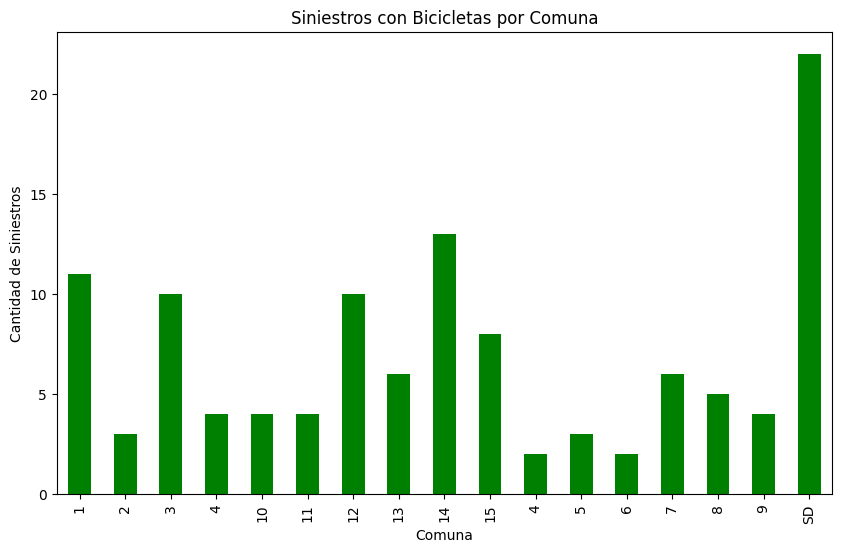

In [59]:
# Agrupar siniestros por comuna
siniestros_por_comuna = hechos_bicicletas.groupby('comuna').size()
print("Siniestros por Comuna", siniestros_por_comuna)

# Gráfico: Siniestros por comuna
plt.figure(figsize=(10, 6))
siniestros_por_comuna.plot(kind='bar', color='green')
plt.title('Siniestros con Bicicletas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Siniestros por Comuna tipo_de_calle
AV. GRAL. PAZ     1
AVENIDA          54
CALLE            40
SD               22
dtype: int64


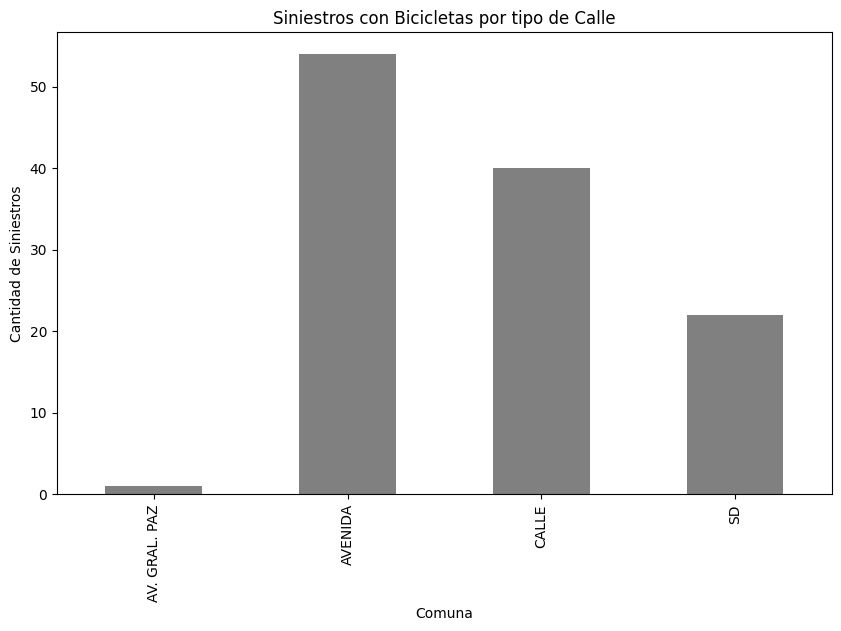

In [60]:
# Agrupar siniestros por comuna
siniestros_por_tipo_calle = hechos_bicicletas.groupby('tipo_de_calle').size()
print("Siniestros por Comuna", siniestros_por_tipo_calle)

# Gráfico: Siniestros por tipo de calle
plt.figure(figsize=(10, 6))
siniestros_por_tipo_calle.plot(kind='bar', color='grey')
plt.title('Siniestros con Bicicletas por tipo de Calle')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.show()

### Conteo de Ciclistas

Secretaría de Transporte y Obras Públicas. Jefatura de Gabinete de Ministros (10 de mayo de 2021). Conteo de Ciclistas. BA Data. Recuperado el día 10 de abril de 2024. https://data.buenosaires.gob.ar/dataset/conteo-ciclistas



In [61]:
conteo_ciclistas = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/CABA/Conteo-Ciclistas/volumen-ciclistas-anuales.csv", delimiter=';', encoding='latin-1')

In [62]:
conteo_ciclistas.head()

,centroide,cruce,año,turno,cantidad_ciclistas,tipo_relevamiento
0,1,CASEROS@RAULET,2013,mañana,15,macrocentro
1,1,CASEROS@RAULET,2013,tarde,17,macrocentro
2,1,CASEROS@RAULET,2014,mañana,7,macrocentro
3,1,CASEROS@RAULET,2014,tarde,15,macrocentro
4,1,CASEROS@RAULET,2015,mañana,11,macrocentro


In [63]:
conteo_ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14688 entries, 0 to 14687
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   centroide           14688 non-null  int64 
 1   cruce               14688 non-null  object
 2   año                 14688 non-null  int64 
 3   turno               14688 non-null  object
 4   cantidad_ciclistas  14688 non-null  int64 
 5   tipo_relevamiento   14688 non-null  object
dtypes: int64(3), object(3)
memory usage: 688.6+ KB


In [64]:
print(conteo_ciclistas.shape)
print("\nResumen de los datos:")
conteo_ciclistas.describe(include='all')

(14688, 6)

Resumen de los datos:


,centroide,cruce,año,turno,cantidad_ciclistas,tipo_relevamiento
count,14688.000000,14688,14688.000000,14688,14688.000000,14688
unique,NaN,795,NaN,2,NaN,2
top,NaN,"BELAUSTEGUI, LUIS, Dr.@VIRASORO, VALENTIN",NaN,mañana,NaN,macrocentro
freq,NaN,22,NaN,7345,NaN,8638
mean,458.295003,NaN,2017.582108,NaN,40.962895,NaN
std,268.677487,NaN,3.218480,NaN,48.060676,NaN
min,1.000000,NaN,2013.000000,NaN,0.000000,NaN
25%,221.000000,NaN,2015.000000,NaN,12.000000,NaN
50%,443.000000,NaN,2017.000000,NaN,25.000000,NaN
75%,713.000000,NaN,2020.000000,NaN,51.000000,NaN


<Figure size 1200x800 with 0 Axes>

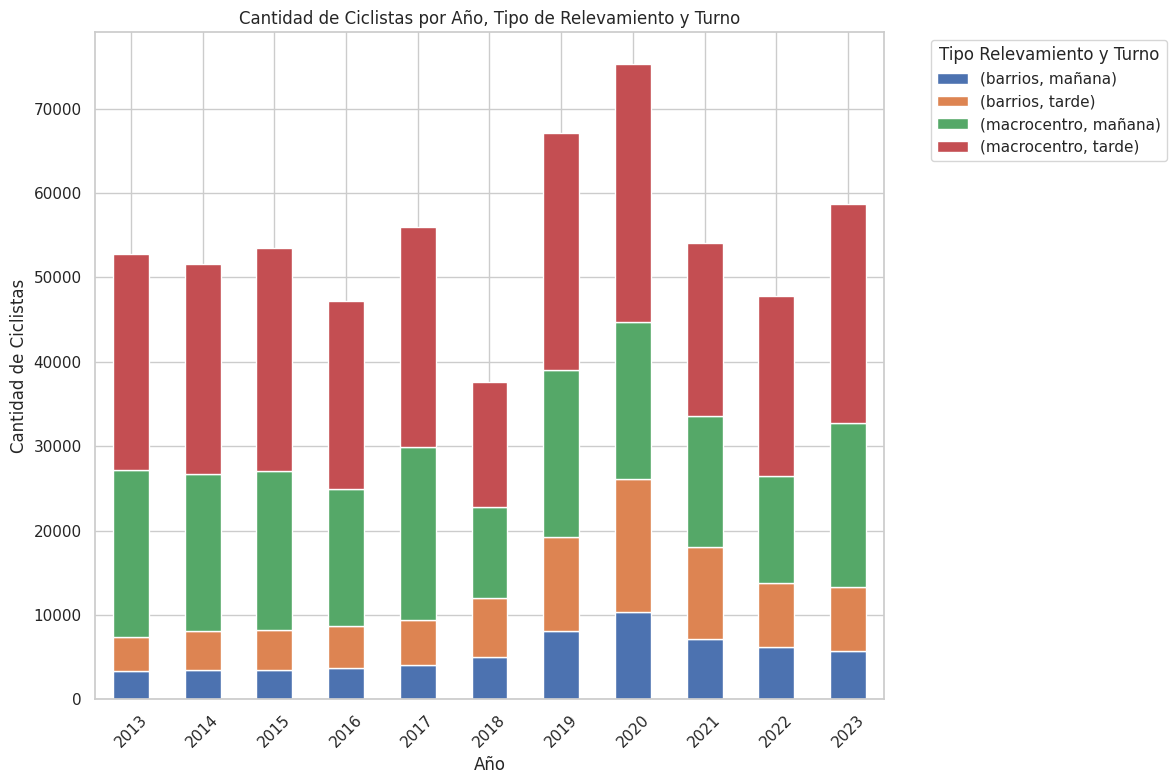

In [65]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Grouping the data by 'año', 'tipo_relevamiento', and 'turno', and summing up the total cyclists
grouped_data = conteo_ciclistas.groupby(['año', 'tipo_relevamiento', 'turno'])['cantidad_ciclistas'].sum().reset_index()

# Creating a pivot table to facilitate plotting
pivot_data = grouped_data.pivot_table(index='año', columns=['tipo_relevamiento', 'turno'], values='cantidad_ciclistas', aggfunc='sum')

# Plotting the total number of cyclists by year, type of relevamiento, and shift
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cantidad de Ciclistas por Año, Tipo de Relevamiento y Turno')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ciclistas')
plt.xticks(rotation=45)
plt.legend(title='Tipo Relevamiento y Turno', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

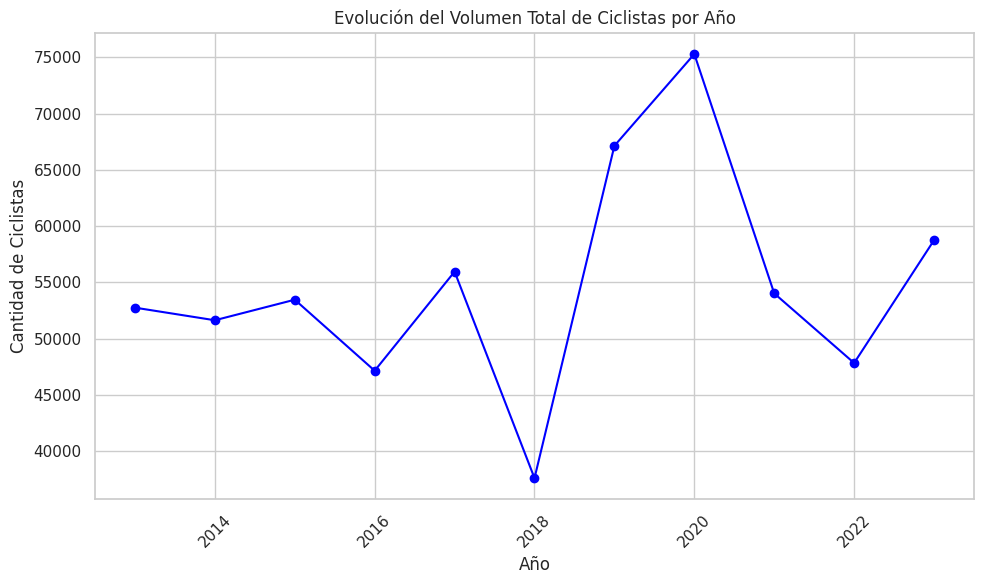

In [66]:
# Evolución total de ciclistas por año
plt.figure(figsize=(10, 6))
total_cyclists_per_year = conteo_ciclistas.groupby('año')['cantidad_ciclistas'].sum()
total_cyclists_per_year.plot(marker='o', color='blue')
plt.title('Evolución del Volumen Total de Ciclistas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ciclistas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-67-328363b1df92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=conteo_ciclistas, x='turno', palette='coolwarm')


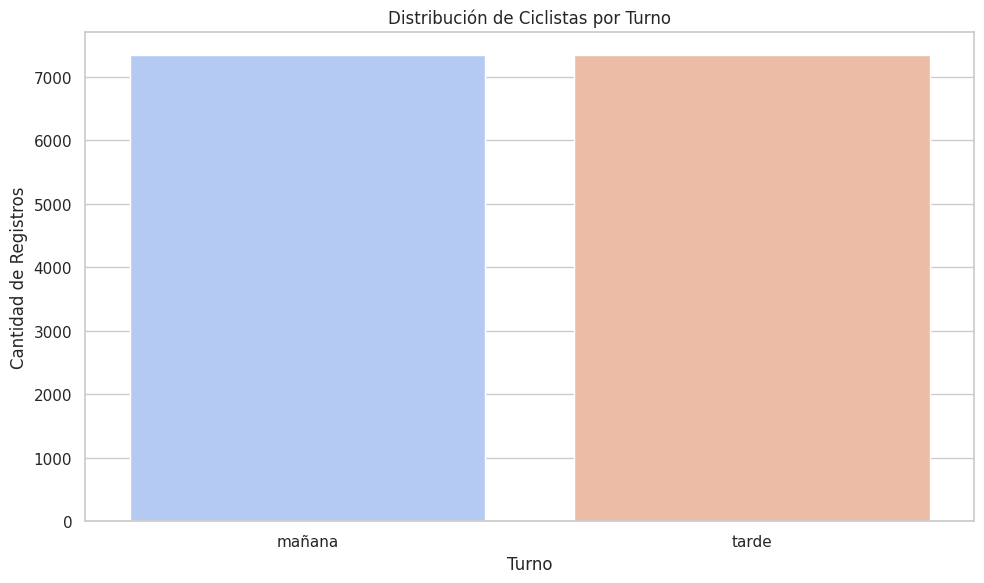

In [67]:
# Distribución de ciclistas por turnos (mañana vs tarde)
plt.figure(figsize=(10, 6))
sns.countplot(data=conteo_ciclistas, x='turno', palette='coolwarm')
plt.title('Distribución de Ciclistas por Turno')
plt.xlabel('Turno')
plt.ylabel('Cantidad de Registros')
plt.tight_layout()
plt.show()

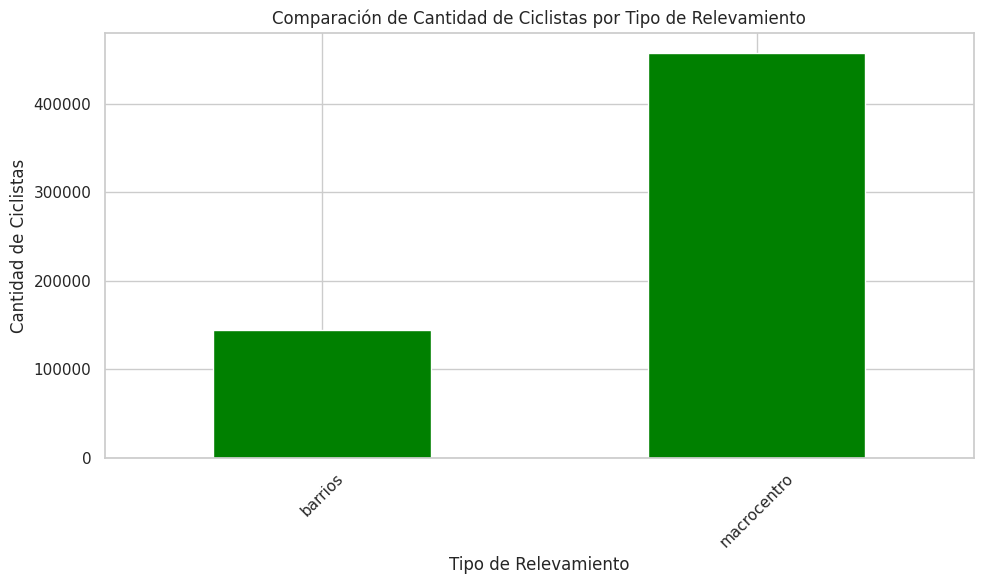

In [68]:
# Comparación de ciclistas por tipo de relevamiento
plt.figure(figsize=(10, 6))
cyclists_per_relevamiento = conteo_ciclistas.groupby('tipo_relevamiento')['cantidad_ciclistas'].sum().sort_values()
cyclists_per_relevamiento.plot(kind='bar', color='green')
plt.title('Comparación de Cantidad de Ciclistas por Tipo de Relevamiento')
plt.xlabel('Tipo de Relevamiento')
plt.ylabel('Cantidad de Ciclistas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-69-3a4518ccfb91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cruces.values, y=top_10_cruces.index, palette='viridis')


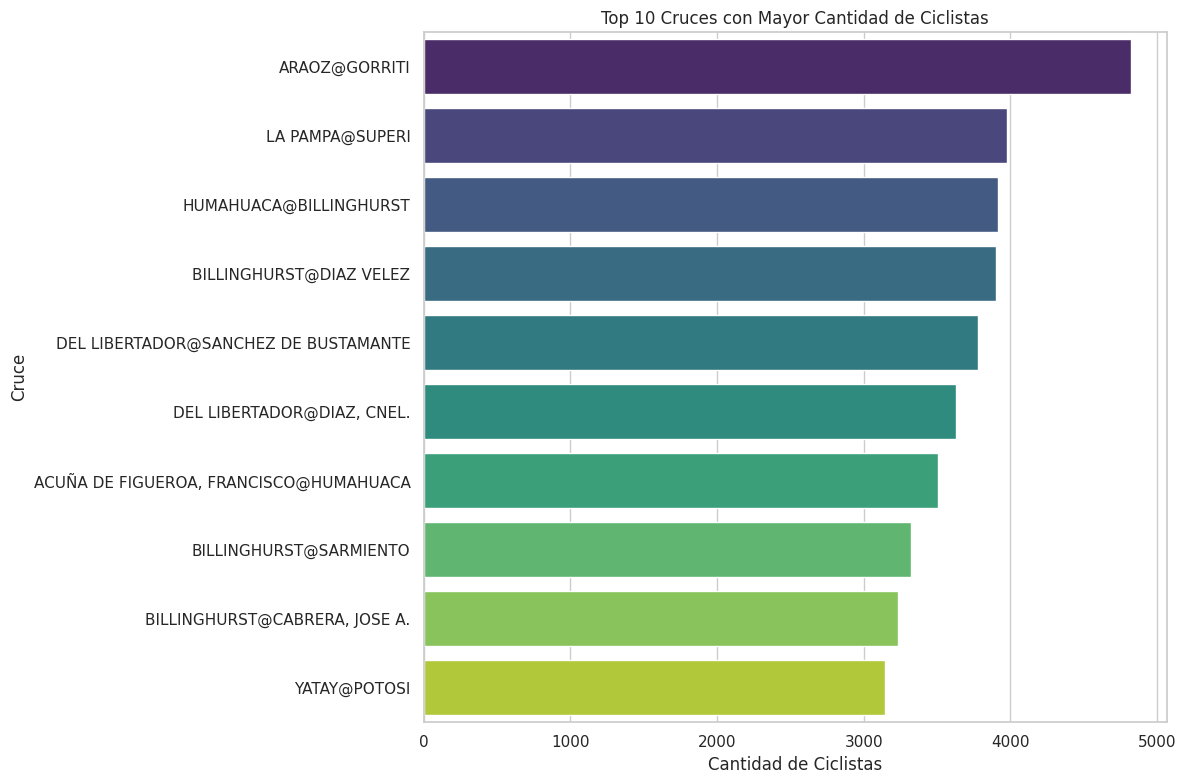

In [69]:
# Top 10 cruces con mayor cantidad de ciclistas
plt.figure(figsize=(12, 8))
top_10_cruces = conteo_ciclistas.groupby('cruce')['cantidad_ciclistas'].sum().nlargest(10)
sns.barplot(x=top_10_cruces.values, y=top_10_cruces.index, palette='viridis')
plt.title('Top 10 Cruces con Mayor Cantidad de Ciclistas')
plt.xlabel('Cantidad de Ciclistas')
plt.ylabel('Cruce')
plt.tight_layout()
plt.show()

<ipython-input-70-250e291d10e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_cyclists_per_cruce.values, y=average_cyclists_per_cruce.index, palette='rocket')


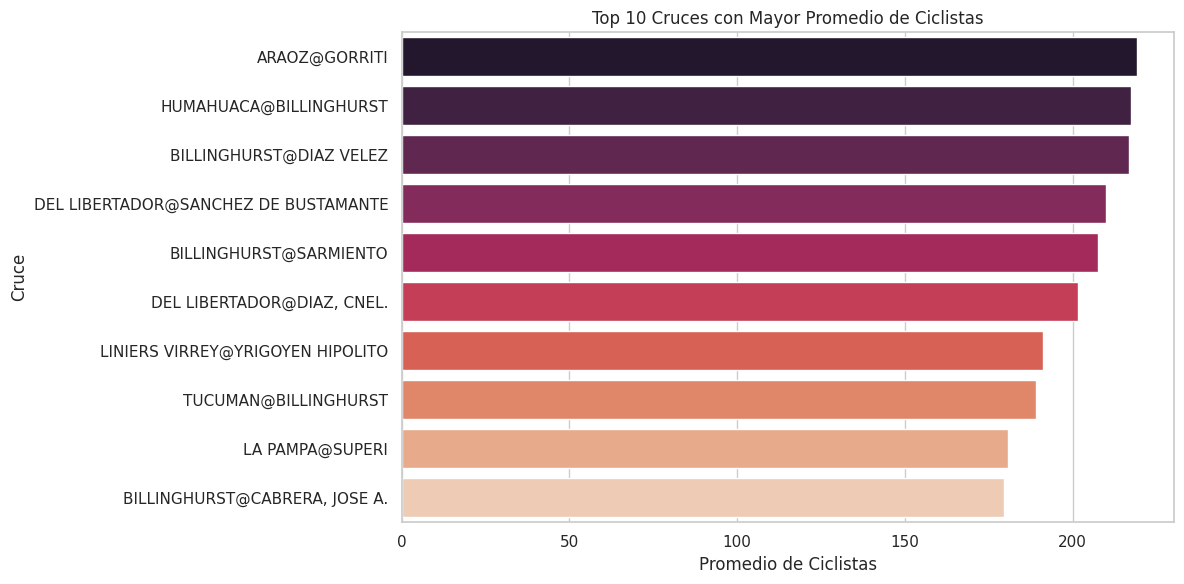

In [70]:
# Promedio de ciclistas por cruce
plt.figure(figsize=(12, 6))
average_cyclists_per_cruce = conteo_ciclistas.groupby('cruce')['cantidad_ciclistas'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=average_cyclists_per_cruce.values, y=average_cyclists_per_cruce.index, palette='rocket')
plt.title('Top 10 Cruces con Mayor Promedio de Ciclistas')
plt.xlabel('Promedio de Ciclistas')
plt.ylabel('Cruce')
plt.tight_layout()
plt.show()

<ipython-input-71-50c6aa518f5e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=conteo_ciclistas, x='año', y='cantidad_ciclistas', hue='turno', ci=None, marker='o', palette='Set1')


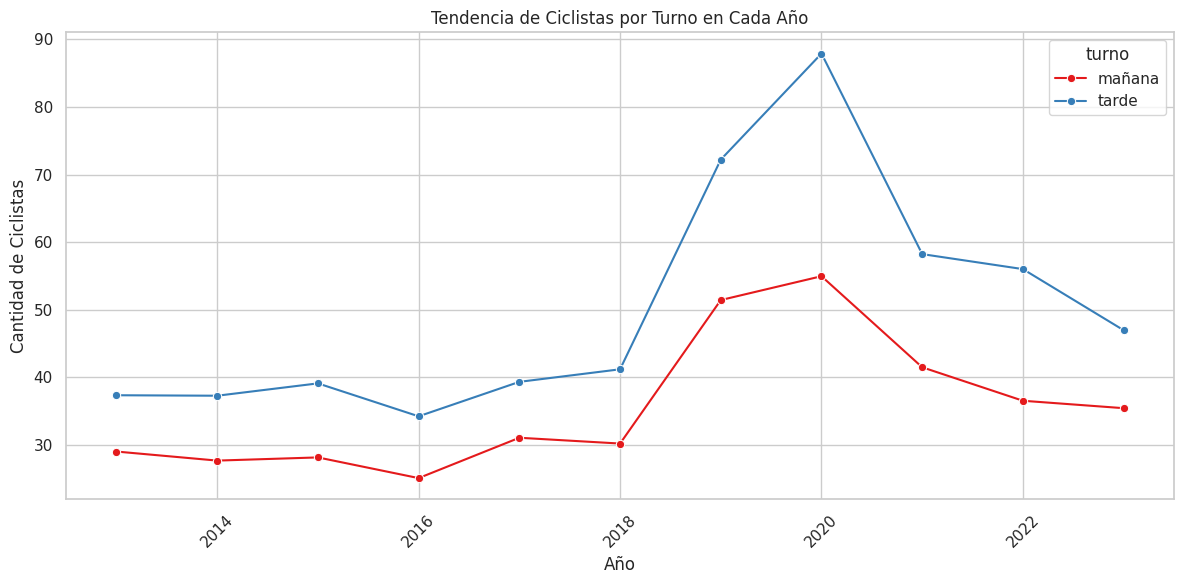

In [71]:
# Tendencia de ciclistas por turno en cada año
plt.figure(figsize=(12, 6))
sns.lineplot(data=conteo_ciclistas, x='año', y='cantidad_ciclistas', hue='turno', ci=None, marker='o', palette='Set1')
plt.title('Tendencia de Ciclistas por Turno en Cada Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ciclistas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-72-aa97e89bcf00>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cyclists_per_centroide.values, y=cyclists_per_centroide.index, palette='magma')


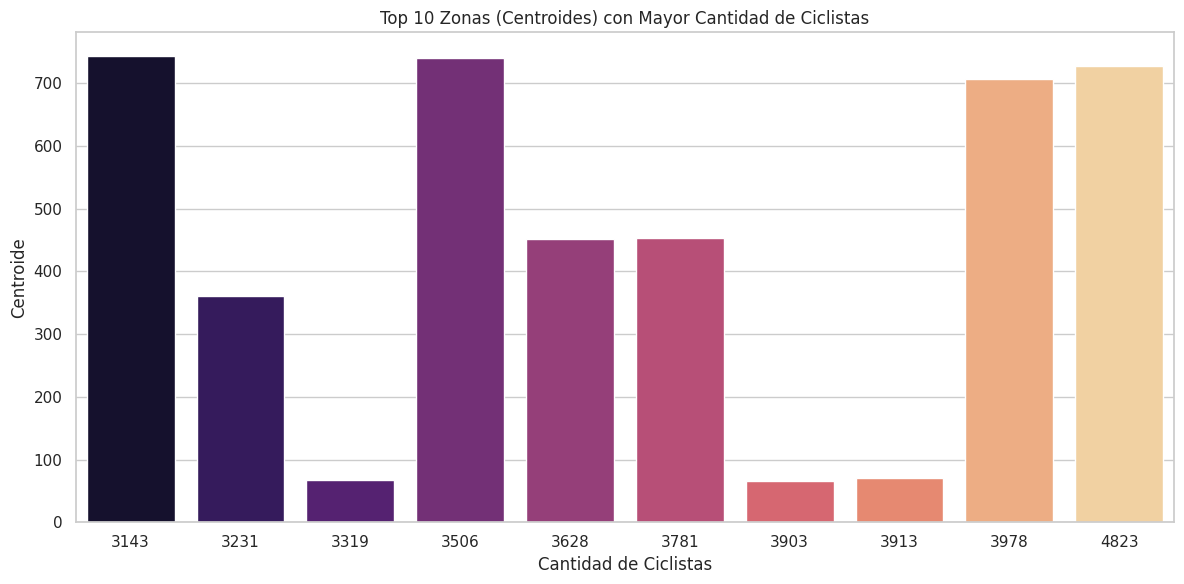

In [72]:
# Análisis de ciclistas por zona (centroide)
plt.figure(figsize=(12, 6))
cyclists_per_centroide = conteo_ciclistas.groupby('centroide')['cantidad_ciclistas'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=cyclists_per_centroide.values, y=cyclists_per_centroide.index, palette='magma')
plt.title('Top 10 Zonas (Centroides) con Mayor Cantidad de Ciclistas')
plt.xlabel('Cantidad de Ciclistas')
plt.ylabel('Centroide')
plt.tight_layout()
plt.show()

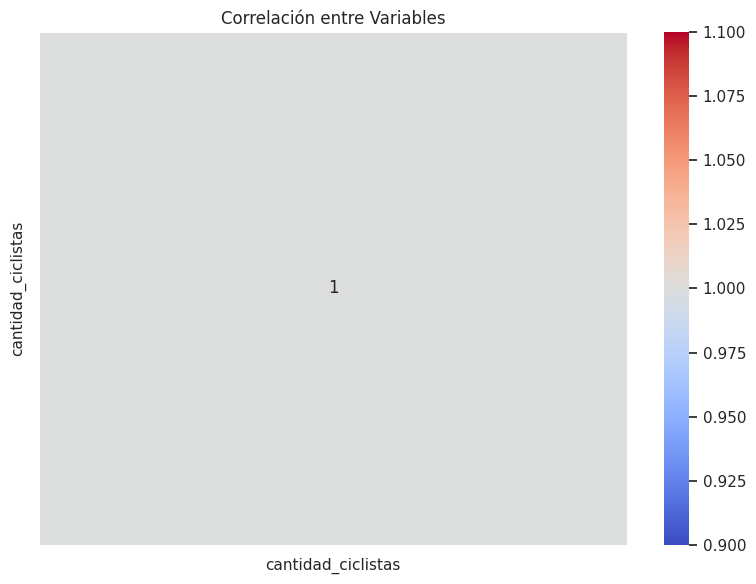

In [73]:
# Correlation heatmap between numerical variables
plt.figure(figsize=(8, 6))
correlation_matrix = conteo_ciclistas[['cantidad_ciclistas']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre Variables')
plt.tight_layout()
plt.show()

### Conteo de Viajes en Bicicletas por la Ciudad

Secretaria de Transporte y Obras Públicas. Jefatura de Gabinete de Ministros (10 de mayo de 2021). Conteo de viajes en bicicleta por la Ciudad. BA Data. Recuperado el día 7 de septiembre de 2022. https://data.buenosaires.gob.ar/dataset/conteo-de-viajes-en-bicicleta-por-la-ciudad


In [74]:
conteo_viajes = pd.read_excel("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/CABA/viajes-diarios/Conteo-cicilistas.xlsx")

In [75]:
conteo_viajes.head()

,AÑO,VIAJES DIARIOS,VIAJES ANUALES
0,2013,172181,51654438
1,2014,183435,55030358
2,2015,192359,57707558
3,2016,187349,56204695
4,2017,208231,62469335


In [76]:
conteo_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AÑO             7 non-null      int64
 1   VIAJES DIARIOS  7 non-null      int64
 2   VIAJES ANUALES  7 non-null      int64
dtypes: int64(3)
memory usage: 296.0 bytes


In [77]:
print(conteo_viajes.shape)
print("\nResumen de los datos:")
conteo_viajes.describe(include='all')

(7, 3)

Resumen de los datos:


,AÑO,VIAJES DIARIOS,VIAJES ANUALES
count,7.000000,7.000000,7.000000e+00
mean,2016.000000,216399.428571,6.491981e+07
std,2.160247,51638.623671,1.549160e+07
min,2013.000000,172181.000000,5.165444e+07
25%,2014.500000,185392.000000,5.561753e+07
50%,2016.000000,192359.000000,5.770756e+07
75%,2017.500000,231573.000000,6.947189e+07
max,2019.000000,316326.000000,9.489785e+07


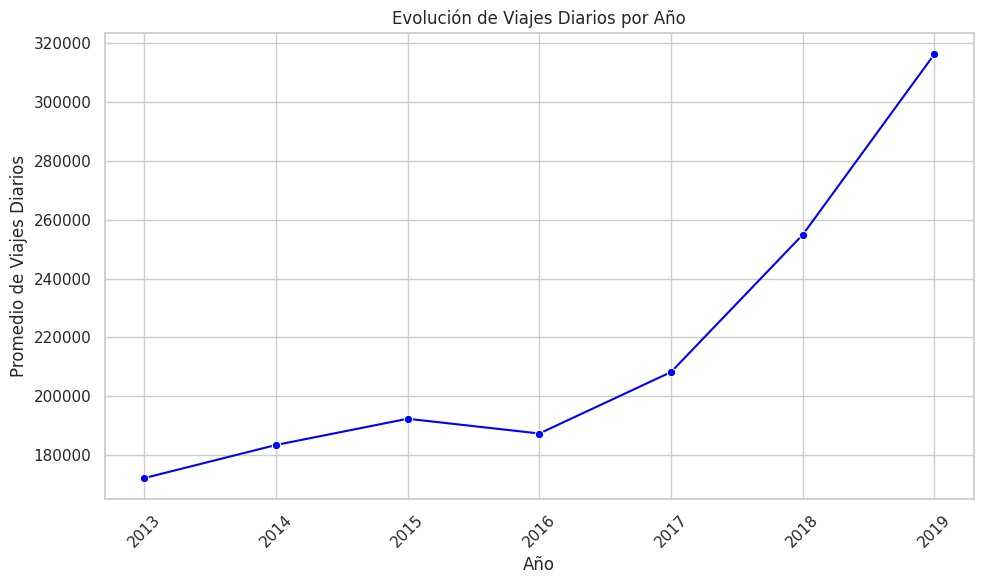

In [78]:
# Evolución de viajes diarios por año
plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_viajes, x='AÑO', y='VIAJES DIARIOS', marker='o', color='blue')
plt.title('Evolución de Viajes Diarios por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Viajes Diarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

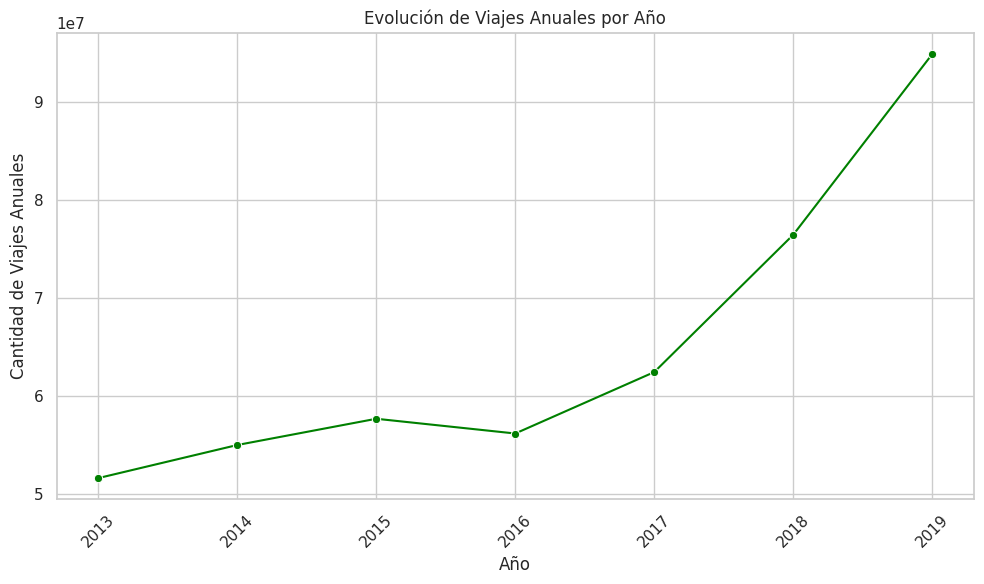

In [79]:
# Evolución de viajes anuales por año
plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_viajes, x='AÑO', y='VIAJES ANUALES', marker='o', color='green')
plt.title('Evolución de Viajes Anuales por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Viajes Anuales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-80-8c2099ce0040>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_viajes, x='AÑO', y='Crecimiento Diario (%)', palette='coolwarm')


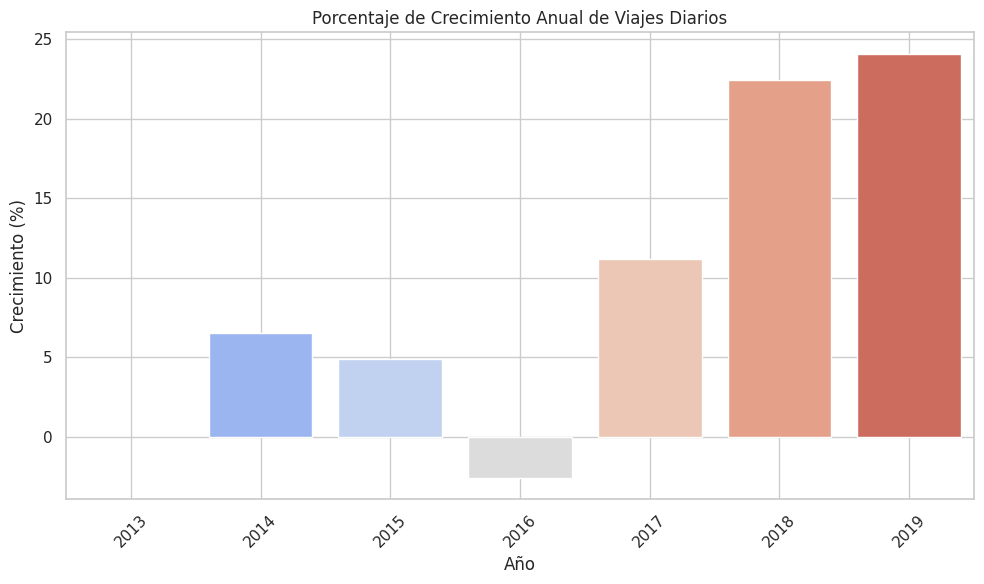

In [80]:
# Porcentaje de crecimiento anual de viajes diarios
conteo_viajes['Crecimiento Diario (%)'] = conteo_viajes['VIAJES DIARIOS'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_viajes, x='AÑO', y='Crecimiento Diario (%)', palette='coolwarm')
plt.title('Porcentaje de Crecimiento Anual de Viajes Diarios')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

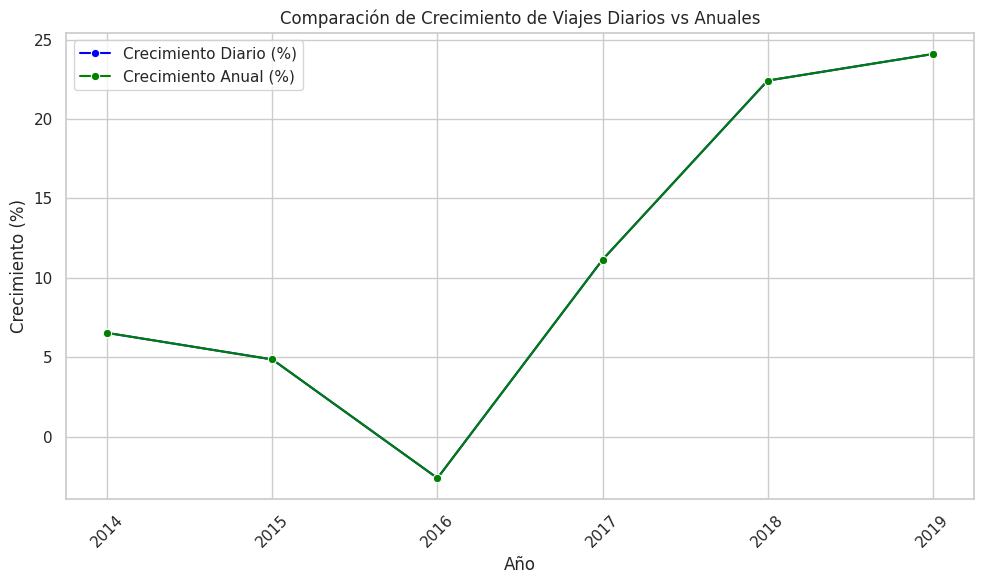

In [81]:
# Comparación del crecimiento de viajes diarios y anuales
conteo_viajes['Crecimiento Anual (%)'] = conteo_viajes['VIAJES ANUALES'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_viajes, x='AÑO', y='Crecimiento Diario (%)', label='Crecimiento Diario (%)', marker='o', color='blue')
sns.lineplot(data=conteo_viajes, x='AÑO', y='Crecimiento Anual (%)', label='Crecimiento Anual (%)', marker='o', color='green')
plt.title('Comparación de Crecimiento de Viajes Diarios vs Anuales')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
# Desviación estándar de los viajes diarios
std_diarios = conteo_viajes['VIAJES DIARIOS'].std()
std_diarios

51638.623670843976

In [83]:
# Top 3 años con mayor crecimiento de viajes anuales
top_3_anios_crecimiento = conteo_viajes.nlargest(3, 'Crecimiento Anual (%)')[['AÑO', 'Crecimiento Anual (%)']]
top_3_anios_crecimiento

,AÑO,Crecimiento Anual (%)
6,2019,24.090930
5,2018,22.419177
4,2017,11.146115


### Comercios con Beneficios a Ciclistas

Ministerio de Desarrollo Urbano y Transporte. Secretaría de Transporte. SS Movilidad Sustentable y Segura. (10 de mayo de 2021). Comercios con beneficios a ciclistas. BA Data. Recuperado el día 15 de diciembre de 2021. https://data.buenosaires.gob.ar/dataset/comercios-con-beneficios-ciclistas

In [84]:
comercios = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/CABA/comercios_con_beneficios_ciclistas/comercios-con-beneficios-a-ciclistas.csv")

In [85]:
comercios.head()

,WKT,id,nombre,telefono,web,email,estacionam,beneficio,calle,altura,calle2,direccion_,barrio,comuna
0,POINT (-58.378414670952 -34.6531446491969),47,3 Esquinas,4302-8571,NaN,NaN,En puerta,10% de descuento,Osvaldo Cruz,2302,NaN,"CRUZ, OSVALDO AV. 2302",Barracas,Comuna 4
1,POINT (-58.4383379608211 -34.5964455587465),17,Almacen Purista,4779-2210,http://www.almacenpurista.com/,info@almacenpurista.com,En puerta,Cafecito especial con tu consumici_n m4nima de...,"RAMIREZ DE VELASCO, JUAN",701,NaN,"RAMIREZ DE VELASCO, JUAN 701",Villa Crespo,Comuna 15
2,POINT (-58.4390713423854 -34.5833150645495),72,Altura Crucero,4773-8936,https://www.facebook.com/AlturaCrucero,contacto@alturacrucero.com,En puerta,Consumiendo el menc almuerzo de Mezzogiorno (m...,Carranza,1601,NaN,"CARRANZA, ANGEL JUSTINIANO 1601",Palermo,Comuna 14
3,POINT (-58.4413851604239 -34.5819434375875),15,Artemisia,4776-5484,http://www.artemisianatural.com.ar/,artemisia@fibertel.com.ar,En puerta,A definir,GORRITI,5996,NaN,GORRITI 5996,Palermo,Comuna 14
4,POINT (-58.5000818945843 -34.5906251696351),110,Baraba Rest6,4574-2822,http://www.barabaresto.com.ar/,manuelmadeo@gmail.com / barabaresto@gmail.com,NaN,Cafu Gratuito,Pareja,2997,NaN,PAREJA 2997,Villa Pueyrredon,Comuna 12


In [86]:
comercios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WKT         107 non-null    object
 1   id          107 non-null    int64 
 2   nombre      107 non-null    object
 3   telefono    96 non-null     object
 4   web         101 non-null    object
 5   email       91 non-null     object
 6   estacionam  82 non-null     object
 7   beneficio   107 non-null    object
 8   calle       107 non-null    object
 9   altura      107 non-null    int64 
 10  calle2      1 non-null      object
 11  direccion_  107 non-null    object
 12  barrio      107 non-null    object
 13  comuna      107 non-null    object
dtypes: int64(2), object(12)
memory usage: 11.8+ KB


In [87]:
print(comercios.shape)
print("\nResumen de los datos:")
comercios.describe(include='all')

(107, 14)

Resumen de los datos:


,WKT,id,nombre,telefono,web,email,estacionam,beneficio,calle,altura,calle2,direccion_,barrio,comuna
count,107,107.000000,107,96,101,91,82,107,107,107.000000,1,107,107,107
unique,107,NaN,92,91,81,81,5,74,88,NaN,1,105,19,12
top,POINT (-58.378414670952 -34.6531446491969),NaN,Tea Connection,4785-1775,http://www.teaconnection.com.ar/,hola@teaconnection.com.ar,En puerta,10% de descuento,GORRITI,NaN,Santo Domingo,FRAY JUSTO SANTAMARIA DE ORO 1702,Palermo,Comuna 14
freq,1,NaN,8,3,8,8,71,11,6,NaN,1,2,53,53
mean,NaN,72.803738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2733.439252,NaN,NaN,NaN,NaN
std,NaN,40.253780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1642.716820,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1583.000000,NaN,NaN,NaN,NaN
50%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2211.000000,NaN,NaN,NaN,NaN
75%,NaN,106.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4079.500000,NaN,NaN,NaN,NaN


<ipython-input-88-241ed83418c8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  comercios['estacionam'].fillna('No especificado', inplace=True)
<ipython-input-88-241ed83418c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=comercios['beneficio'], order=comercios['beneficio'].value_counts().index, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/IPython/core/pyl

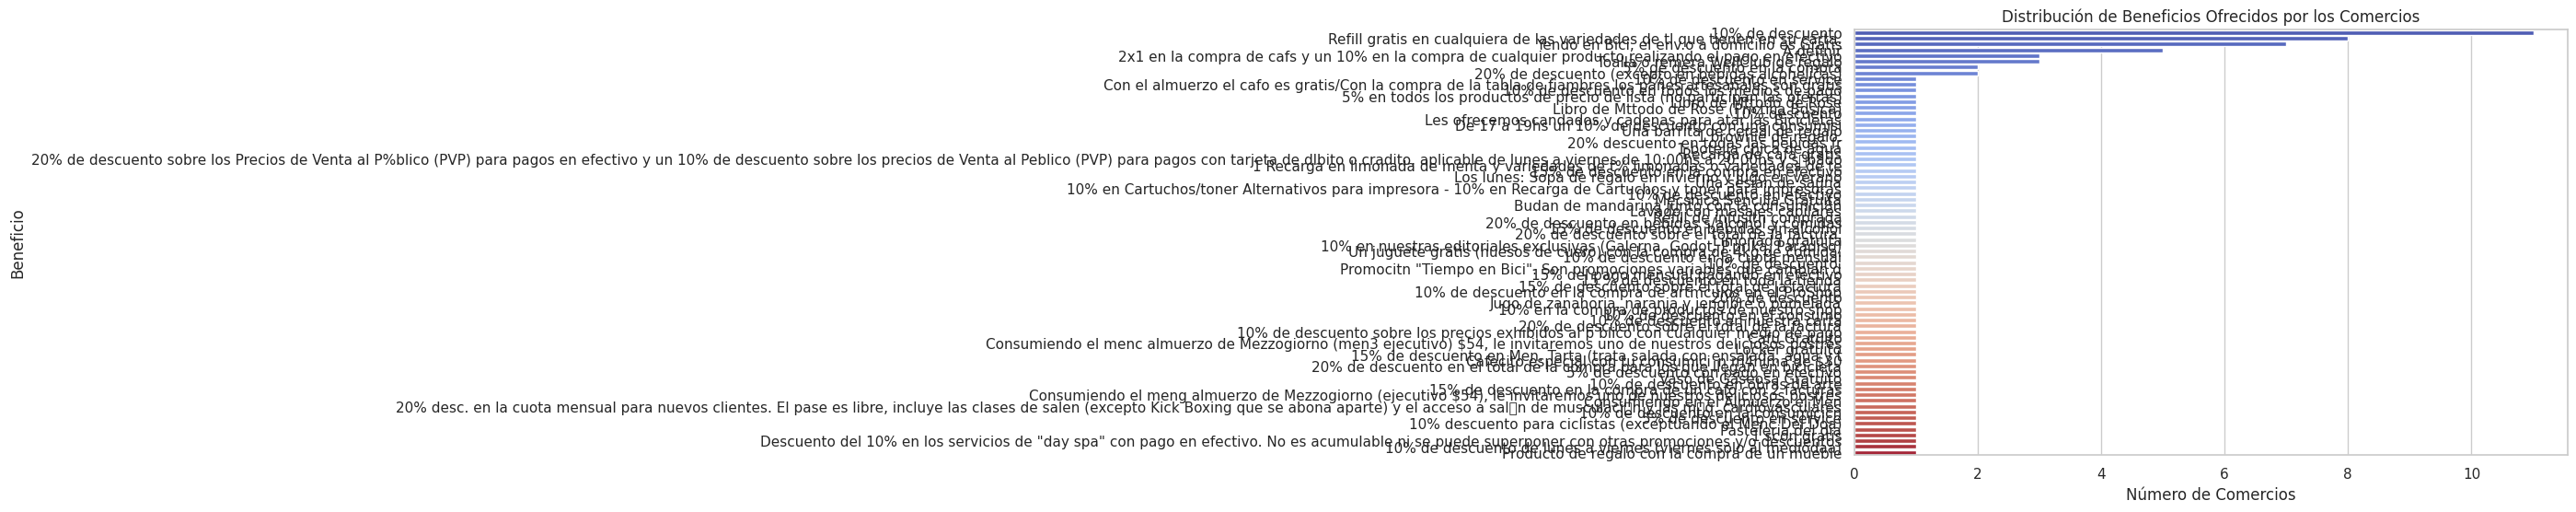

In [88]:
# Limpiar la columna 'estacionam' para rellenar NaN con 'No especificado'
comercios['estacionam'].fillna('No especificado', inplace=True)

# Distribución de los beneficios por tipo
plt.figure(figsize=(10, 6))
sns.countplot(y=comercios['beneficio'], order=comercios['beneficio'].value_counts().index, palette='coolwarm')
plt.title('Distribución de Beneficios Ofrecidos por los Comercios')
plt.xlabel('Número de Comercios')
plt.ylabel('Beneficio')
plt.show()

<ipython-input-89-2551501801d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=comercios['barrio'], order=comercios['barrio'].value_counts().index, palette='viridis')


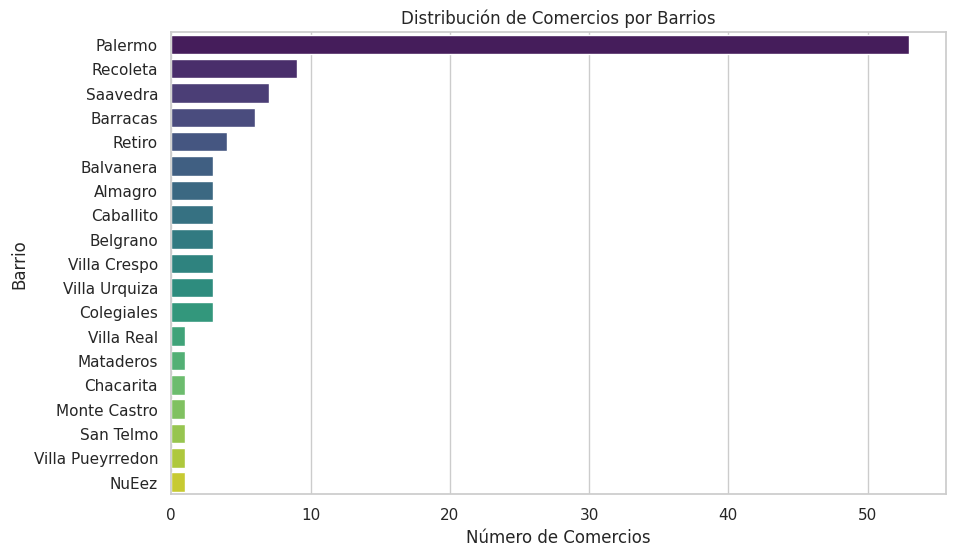

In [89]:
# Distribución de comercios por barrios
plt.figure(figsize=(10, 6))
sns.countplot(y=comercios['barrio'], order=comercios['barrio'].value_counts().index, palette='viridis')
plt.title('Distribución de Comercios por Barrios')
plt.xlabel('Número de Comercios')
plt.ylabel('Barrio')
plt.show()

<ipython-input-90-f791fda512da>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estacionam', data=comercios, palette='pastel')


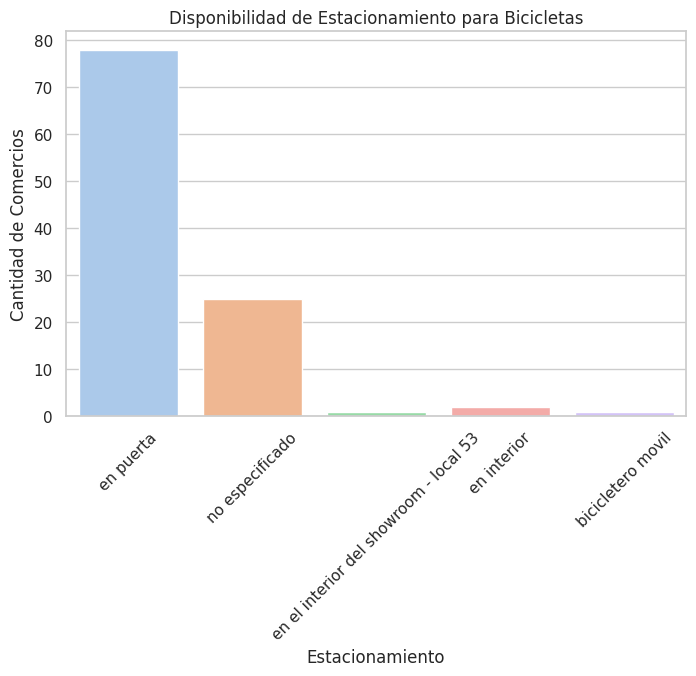

In [90]:
# Colocar todo en minuscula
comercios['estacionam'] = comercios['estacionam'].str.lower()

# Disponibilidad de estacionamiento
plt.figure(figsize=(8, 5))
sns.countplot(x='estacionam', data=comercios, palette='pastel')
plt.title('Disponibilidad de Estacionamiento para Bicicletas')
plt.xlabel('Estacionamiento')
plt.ylabel('Cantidad de Comercios')
plt.xticks(rotation=45)
plt.show()

<ipython-input-91-19ba80cca0cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=comercios['comuna'], order=comercios['comuna'].value_counts().index, palette='magma')


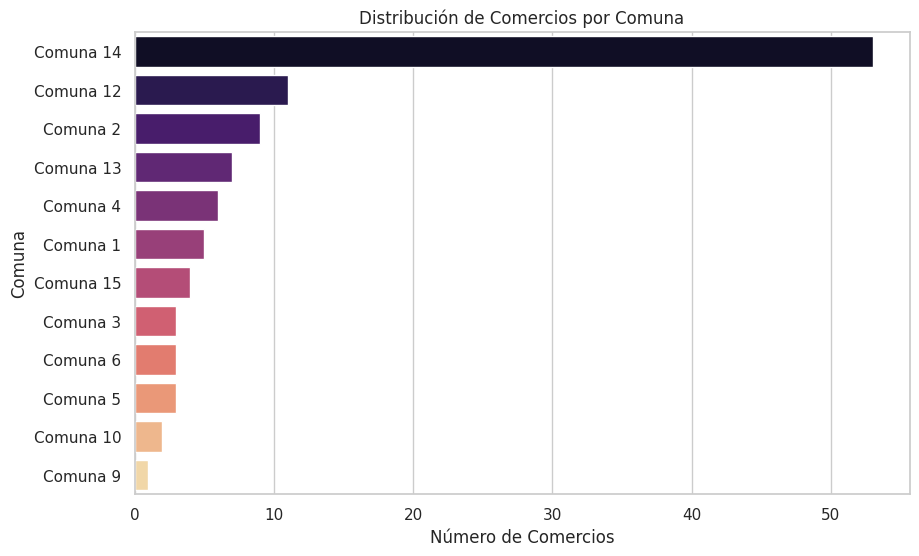

In [91]:
# Distribución de comercios por comunas
plt.figure(figsize=(10, 6))
sns.countplot(y=comercios['comuna'], order=comercios['comuna'].value_counts().index, palette='magma')
plt.title('Distribución de Comercios por Comuna')
plt.xlabel('Número de Comercios')
plt.ylabel('Comuna')
plt.show()

In [92]:
# Limpiar las coordenadas y separarlas en latitud y longitud para un análisis geoespacial
# Extraer la latitud y longitud desde el campo WKT

# Función para extraer latitud y longitud de la columna WKT
def extract_lat_lon(wkt):
    wkt = wkt.replace("POINT (", "").replace(")", "")
    lon, lat = map(float, wkt.split())
    return lat, lon

# Aplicar la función al dataframe
comercios['latitud'], comercios['longitud'] = zip(*comercios['WKT'].apply(extract_lat_lon))

# Ver cuántos comercios tienen información completa de contacto (teléfono, web y email)
comercios['contacto_completo'] = comercios[['telefono', 'web', 'email']].notna().all(axis=1)
comercios['contacto_completo']

,contacto_completo
0,False
1,True
2,True
3,True
4,True
...,...
102,True
103,True
104,False
105,True


<ipython-input-93-942bbb4078b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='contacto_completo', data=comercios, palette='Set2')


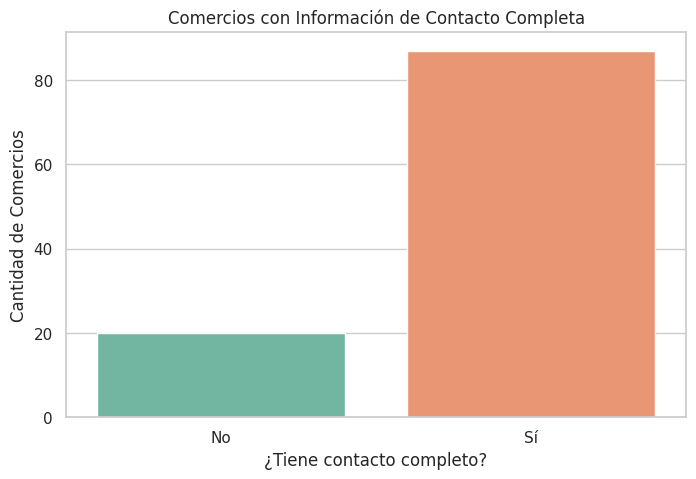

In [93]:
# Gráfico de comercios con/ sin contacto completo
plt.figure(figsize=(8, 5))
sns.countplot(x='contacto_completo', data=comercios, palette='Set2')
plt.title('Comercios con Información de Contacto Completa')
plt.xlabel('¿Tiene contacto completo?')
plt.ylabel('Cantidad de Comercios')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 16720 (\N{CJK UNIFIED IDEOGRAPH-4150}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28771 (\N{CJK UNIFIED IDEOGRAPH-7063}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9324 (\N{CIRCLED NUMBER THIRTEEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


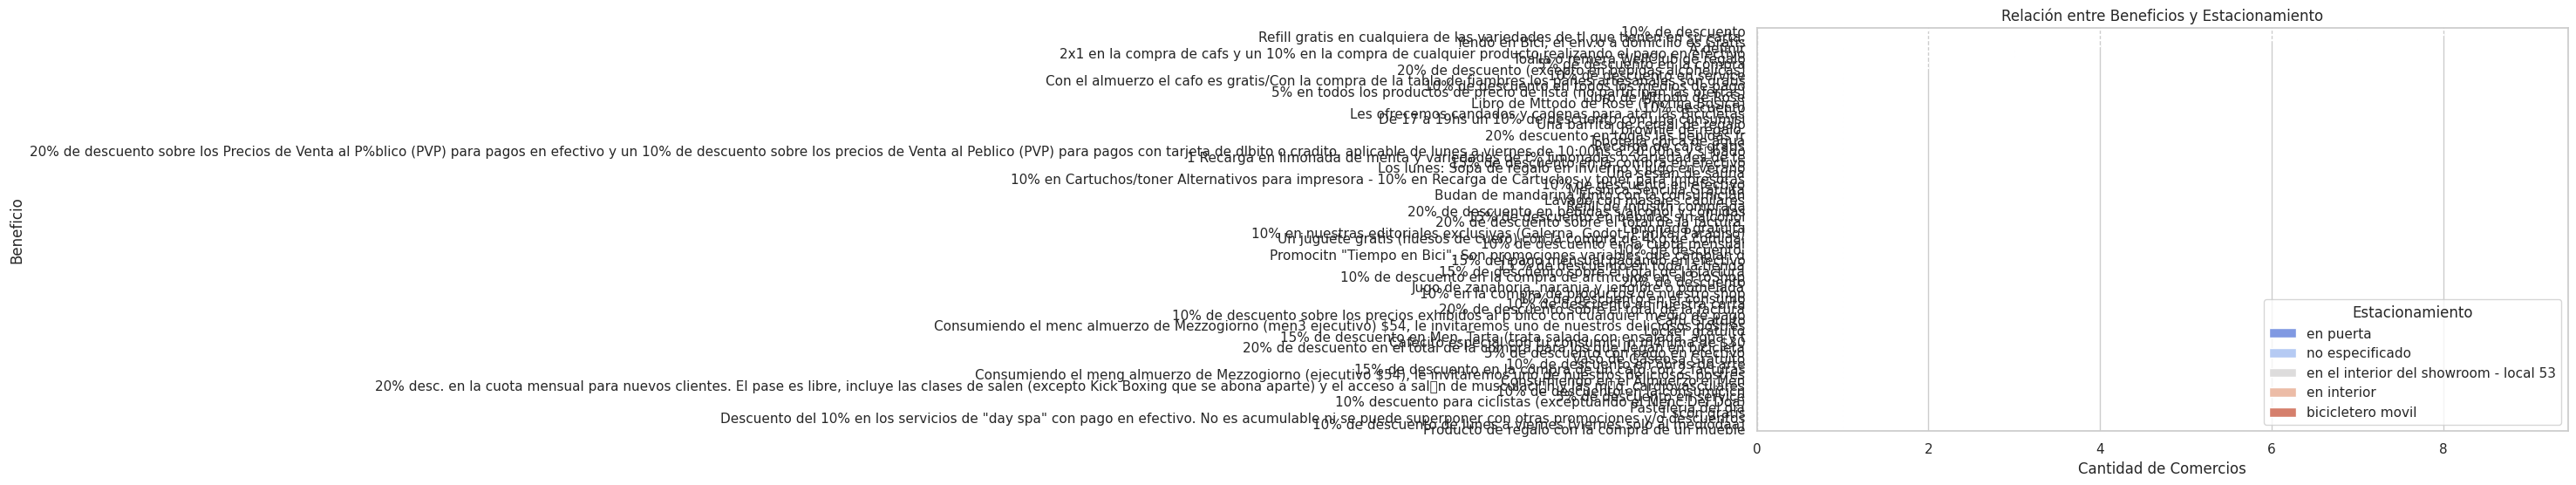

In [94]:
# Relación entre beneficios y disponibilidad de estacionamiento
plt.figure(figsize=(12, 6))
sns.countplot(y='beneficio', hue='estacionam', data=comercios, palette='coolwarm', order=comercios['beneficio'].value_counts().index)
plt.title('Relación entre Beneficios y Estacionamiento')
plt.xlabel('Cantidad de Comercios')
plt.ylabel('Beneficio')
plt.legend(title='Estacionamiento')
plt.show()

In [95]:
# Análisis de beneficios más comunes por barrio
beneficios_por_barrio = pd.crosstab(comercios['barrio'], comercios['beneficio'])
beneficios_por_barrio

beneficio,1 Recarga en limonada de menta y variedades de t% limonadas o variedades de te,1 botella chica de agua,1 brownie de regalo.,1 scon gratis,10% de descuento,10% de descuento de lunes a viernes (viernes solo al mediodaa),10% de descuento en efectivo,10% de descuento en el consumo,10% de descuento en la compra de artmculos en el ProShop,10% de descuento en la consumicicn,...,"Promocitn ""Tiempo en Bici"". Son promociones variables que cambian d",Recarga de cafa gratis,Refill de infusitn comprada,Refill gratis en cualquiera de las variedades de tl que tienen en su carta.,Toalla o remera WellClub de regalo,Un juguete gratis (huesos de cuero) con la compra de 4kg de comida.,Una barrita de cereal de regalo,Una sesian de sauna,Vaso de Gaseosa Gratuito,"Yendo en Bici, el env.o a domicilio es Gratis"
barrio,,,,,,,,,,,,,,,,,,,,,
Almagro,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Balvanera,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Barracas,0,0,0,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgrano,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Caballito,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Chacarita,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Colegiales,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
Mataderos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Monte Castro,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 28771 (\N{CJK UNIFIED IDEOGRAPH-7063}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9324 (\N{CIRCLED NUMBER THIRTEEN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28771 (\N{CJK UNIFIED IDEOGRAPH-7063}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9324 (\N{CIRCLED 

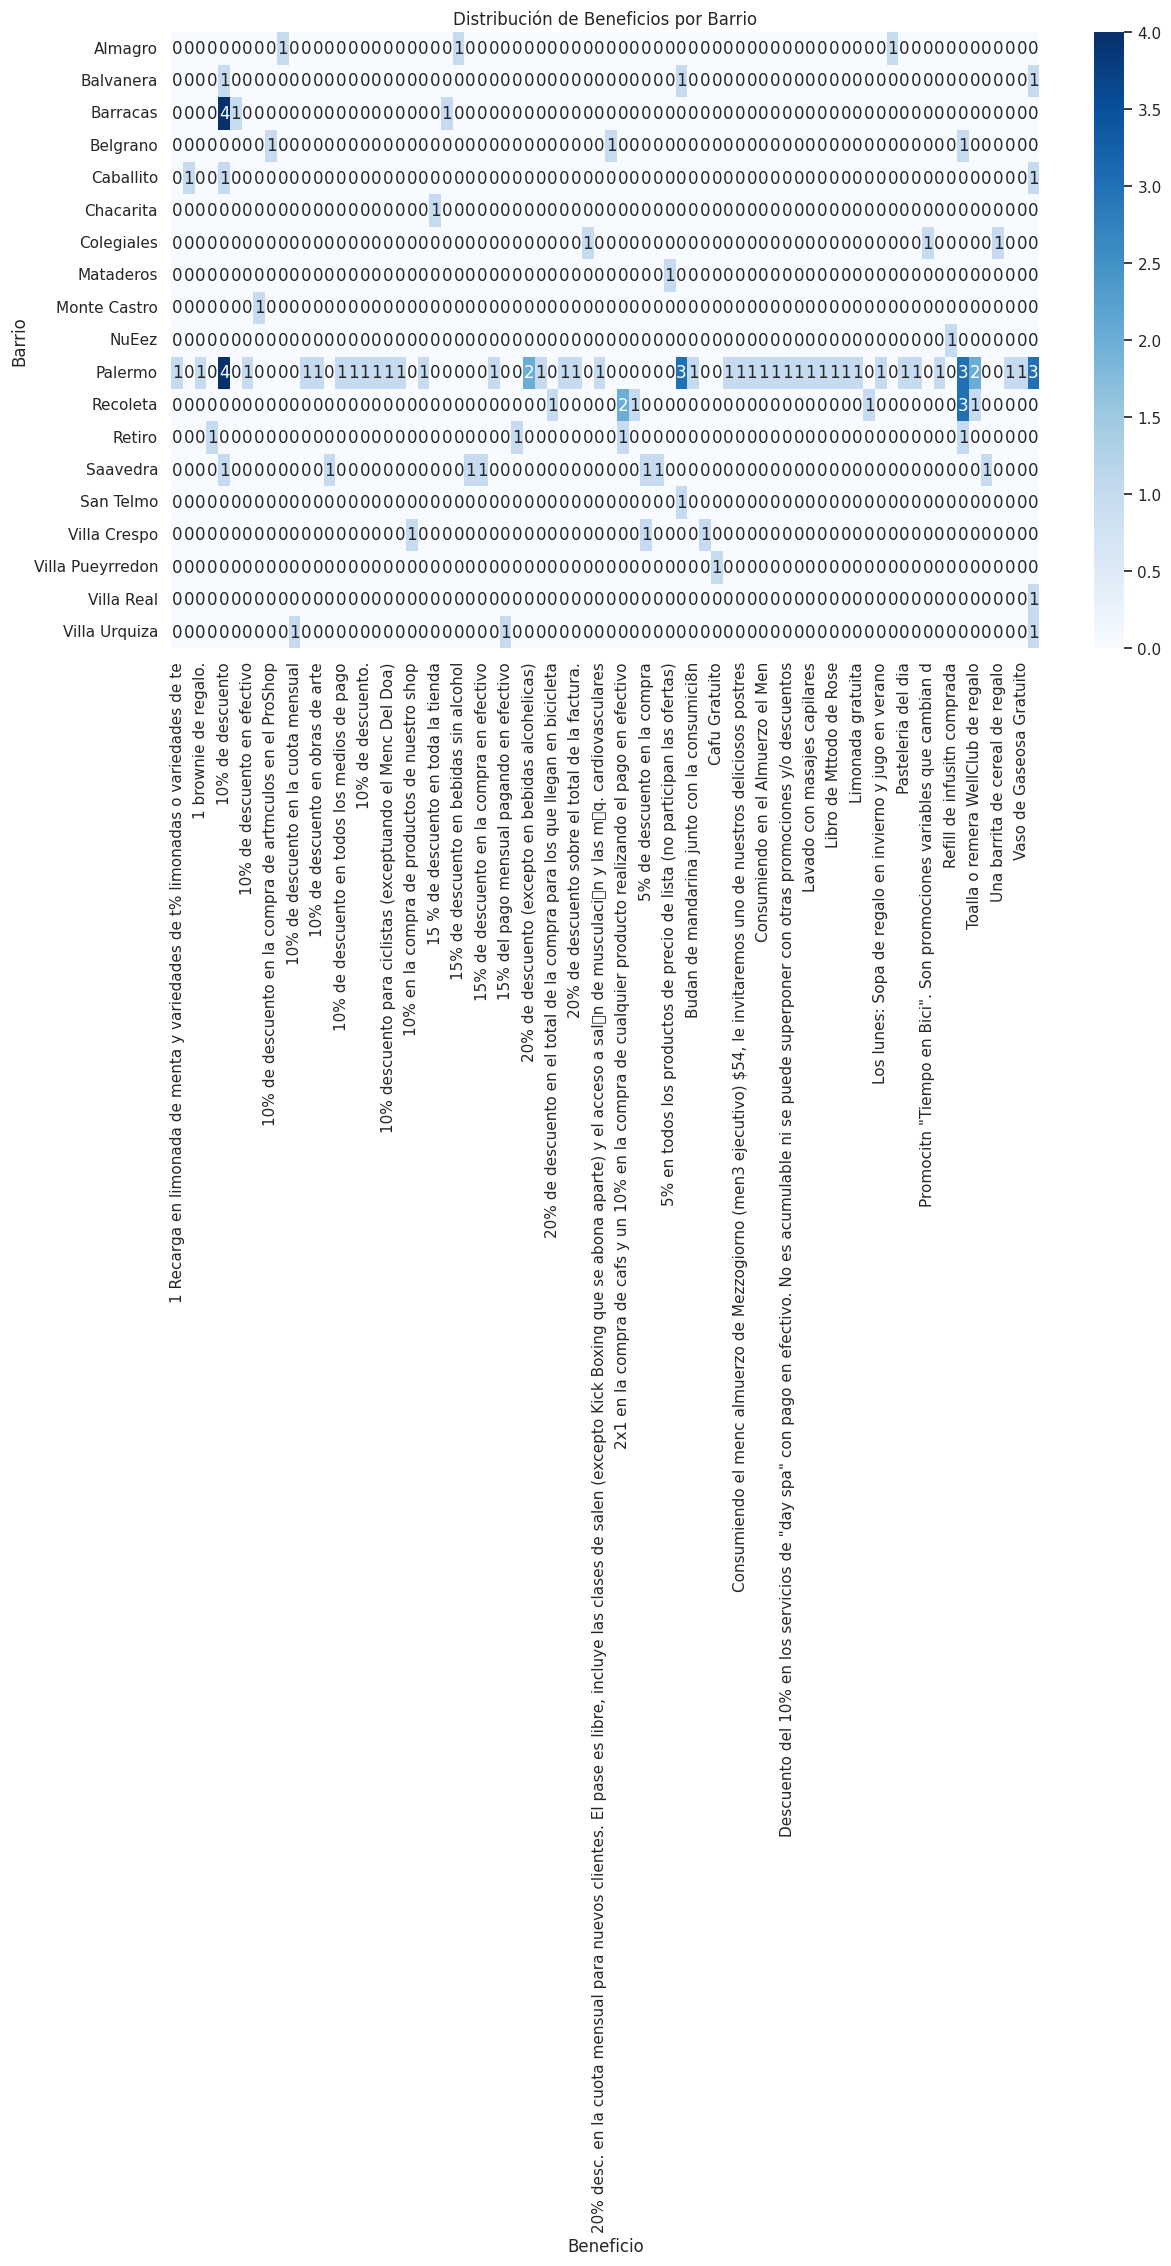

In [96]:
# Plot de calor para visualizar la relación entre barrios y beneficios
plt.figure(figsize=(14, 8))
sns.heatmap(beneficios_por_barrio, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.title('Distribución de Beneficios por Barrio')
plt.xlabel('Beneficio')
plt.ylabel('Barrio')
plt.xticks(rotation=90)
plt.show()

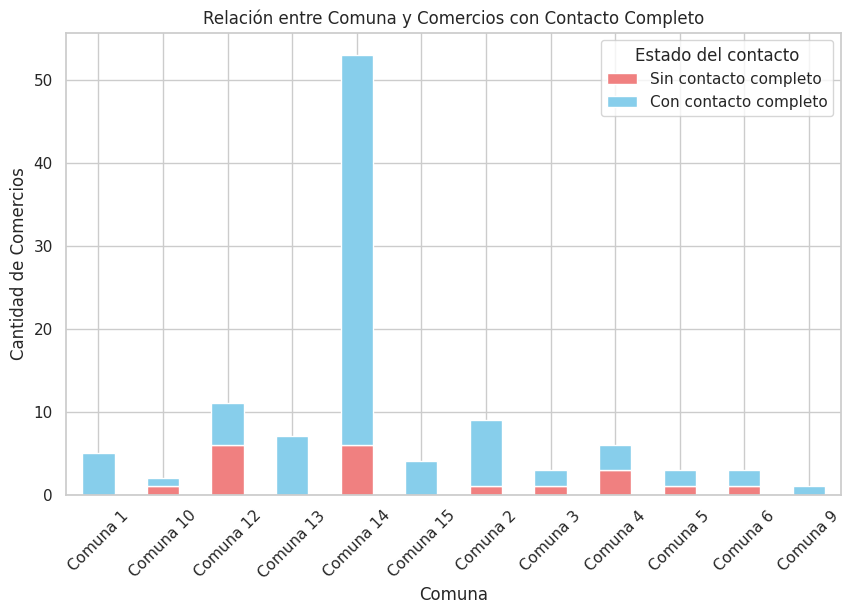

In [97]:
# Relación entre comuna y contacto completo
comuna_contacto_completo = pd.crosstab(comercios['comuna'], comercios['contacto_completo'])

# Gráfico de barras para visualizar la relación
comuna_contacto_completo.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'skyblue'])
plt.title('Relación entre Comuna y Comercios con Contacto Completo')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Comercios')
plt.xticks(rotation=45)
plt.legend(['Sin contacto completo', 'Con contacto completo'], title='Estado del contacto')
plt.show()

## Datos de la Provincia de Buenos Aires



### Defunción por accidentes viales

Ministerio de Transporte. Subsecretaría de Política y Seguridad Vial. Dirección Provincial de Observatorio Vial. Dirección de Estadística Vial (1 de octubre de 2019). Defunciones por incidentes viales. Gobierno de la provincia de Buenos Aires. Recuperado el día 2 de agosto de 2024. https://catalogo.datos.gba.gob.ar/dataset/defunciones-por-incidentes-viales


In [98]:
accidente_provincia = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/Provincia-BuenosAires/Muertes-Viales/defunciones-incidentes-viales-2017.csv", delimiter=',', encoding="utf-8")

In [99]:
accidente_provincia.head()

,fuente_datos,numero_victima,municipio_id,municipio_nombre,fecha_hecho,hora_hecho,momento_hecho,edad,sexo,clase_victima,vehiculo_victima,tipo_via,tipo_incidente,clima
0,Egresos hospitalarios,2-2017-1293,NaN,NaN,2016-12-14,Sin especificar,Sin especificar,75,Masculino,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar
1,Ministerio de Seguridad,1-2017-1,60412.0,José C. Paz,2017-01-01,07:10:00,Diurno,21,Masculino,Conductor,Vehículo,Ruta provincial,Colisión vehículo/Vehículo,Bueno
2,Ministerio de Seguridad,1-2017-1039,60412.0,José C. Paz,2017-01-01,06:05:00,Nocturno,22,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Sin especificar
3,Ministerio de Seguridad,1-2017-2,60412.0,José C. Paz,2017-01-01,07:10:00,Diurno,42,Masculino,Conductor,Vehículo,Ruta provincial,Colisión vehículo/Vehículo,Bueno
4,Ministerio de Seguridad,1-2017-592,60098.0,Berisso,2017-01-01,01:40:00,Nocturno,18,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Bueno


In [100]:
accidente_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fuente_datos      1369 non-null   object 
 1   numero_victima    1369 non-null   object 
 2   municipio_id      713 non-null    float64
 3   municipio_nombre  713 non-null    object 
 4   fecha_hecho       1369 non-null   object 
 5   hora_hecho        1369 non-null   object 
 6   momento_hecho     1369 non-null   object 
 7   edad              1369 non-null   object 
 8   sexo              1369 non-null   object 
 9   clase_victima     1369 non-null   object 
 10  vehiculo_victima  1369 non-null   object 
 11  tipo_via          1369 non-null   object 
 12  tipo_incidente    1369 non-null   object 
 13  clima             1369 non-null   object 
dtypes: float64(1), object(13)
memory usage: 149.9+ KB


In [101]:
print(accidente_provincia.shape)
print("\nResumen de los datos:")
accidente_provincia.describe(include='all')

(1369, 14)

Resumen de los datos:


,fuente_datos,numero_victima,municipio_id,municipio_nombre,fecha_hecho,hora_hecho,momento_hecho,edad,sexo,clase_victima,vehiculo_victima,tipo_via,tipo_incidente,clima
count,1369,1369,713.000000,713,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
unique,3,1369,NaN,24,348,291,4,92,2,6,10,8,6,6
top,Ministerio de Seguridad,2-2017-1293,NaN,Florencio Varela,2017-04-01,Sin especificar,Nocturno,Sin especificar,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Sin especificar
freq,1186,1,NaN,98,18,128,672,131,1077,662,428,625,694,900
mean,NaN,NaN,60337.622721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,243.084716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,60007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,60098.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,60274.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,60515.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Filtrar filas donde 'participante' o 'victima' contengan la palabra "bicicleta" (insensible a mayúsculas)
accidentes_bicicleta_provincia = accidente_provincia[(accidente_provincia['vehiculo_victima'] == 'Bicicleta') &
            (accidente_provincia['municipio_id'] == 60028)]

In [103]:
accidentes_bicicleta_provincia.head()

,fuente_datos,numero_victima,municipio_id,municipio_nombre,fecha_hecho,hora_hecho,momento_hecho,edad,sexo,clase_victima,vehiculo_victima,tipo_via,tipo_incidente,clima
51,Ministerio de Seguridad,1-2017-221,60028.0,Almirante Brown,2017-01-16,12:30:00,Diurno,84,Masculino,Conductor,Bicicleta,Calle,Colisión vehículo/Vehículo,Sin especificar


## Datos a Nivel Nacional Argentina



### Defunción por accidentes viales

Ministerio de Seguridad de la Nación. Dirección Nacional de Estadística Criminal (30 de agosto de 2021). Muertes viales. Sistema de Alerta Temprana. Estadísticas criminales en la República Argentina. datos.gob.ar. Recuperado el dia 8 de diciembre de 2023. https://datos.gob.ar/ko_KR/dataset/seguridad-muertes-viales-sistema-alerta-temprana-estadisticas-criminales-republica-argentina

In [104]:
accidente_nacion = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/Nacional/Muertes-viales/SAT-MV-BU_2017-2022.csv", delimiter=',', encoding="utf-8")

<ipython-input-104-a1f6d439b1e6>:1: DtypeWarning: Columns (8,28) have mixed types. Specify dtype option on import or set low_memory=False.
  accidente_nacion = pd.read_csv("/content/drive/MyDrive/TrabajoFinal-Ciclovias/Datos_Secundarios/Nacional/Muertes-viales/SAT-MV-BU_2017-2022.csv", delimiter=',', encoding="utf-8")


In [105]:
accidente_nacion.head()

,id_hecho,federal,tipo_persona,tipo_persona_id,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,...,victima_vehiculo,victima_vehiculo_ampliado,victima_vehiculo_otro,victima_identidad_genero,inculpado_sexo,inculpado_tr_edad,inculpado_vehiculo,inculpado_vehiculo_ampliado,inculpado_vehiculo_otro,inculpado_genero
0,13075,0,Imputado,Imputado idRegistro 13483,58,Neuquén,58035,Confluencia,70,Neuquén,...,No corresponde,-----,NaN,No corresponde,Masculino,25-29,Camioneta,Camioneta,NaN,Varón
1,13075,0,Víctima,Víctima idRegistro 16629,58,Neuquén,58035,Confluencia,70,Neuquén,...,Camioneta,Camioneta,Camioneta,Varón,No corresponde,No corresponde,No corresponde,No corresponde,NaN,No corresponde
2,13076,0,Imputado,Imputado idRegistro 13484,58,Neuquén,58035,Confluencia,70,Neuquén,...,No corresponde,-----,NaN,No corresponde,Femenino,30-34,Automóvil,Automóvil,NaN,Mujer
3,13076,0,Imputado,Imputado idRegistro 13485,58,Neuquén,58035,Confluencia,70,Neuquén,...,No corresponde,-----,NaN,No corresponde,Masculino,35-39,Automóvil,Automóvil,NaN,Varón
4,13076,0,Víctima,Víctima idRegistro 16630,58,Neuquén,58035,Confluencia,70,Neuquén,...,Motocicleta,Motocicleta,NaN,Varón,No corresponde,No corresponde,No corresponde,No corresponde,NaN,No corresponde


In [106]:
accidente_nacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45003 entries, 0 to 45002
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_hecho                        45003 non-null  int64  
 1   federal                         45003 non-null  int64  
 2   tipo_persona                    45003 non-null  object 
 3   tipo_persona_id                 45003 non-null  object 
 4   provincia_id                    45003 non-null  int64  
 5   provincia_nombre                45003 non-null  object 
 6   departamento_id                 45003 non-null  int64  
 7   departamento_nombre             45003 non-null  object 
 8   localidad_id                    45003 non-null  object 
 9   localidad_nombre                45003 non-null  object 
 10  latitud                         27883 non-null  float64
 11  longitud                        27883 non-null  float64
 12  anio                            

In [107]:
print(accidente_nacion.shape)
print("\nResumen de los datos:")
accidente_nacion.describe(include='all')

(45003, 43)

Resumen de los datos:


,id_hecho,federal,tipo_persona,tipo_persona_id,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,...,victima_vehiculo,victima_vehiculo_ampliado,victima_vehiculo_otro,victima_identidad_genero,inculpado_sexo,inculpado_tr_edad,inculpado_vehiculo,inculpado_vehiculo_ampliado,inculpado_vehiculo_otro,inculpado_genero
count,45003.000000,45003.000000,45003,45003,45003.000000,45003,45003.000000,45003,45003.0,45003,...,45003,45003,213,45003,45003,45003,45003,44996,224,45003
unique,NaN,NaN,2,45003,NaN,24,NaN,430,177.0,1784,...,13,23,36,4,4,20,12,20,50,5
top,NaN,NaN,Víctima,Imputado idRegistro 13483,NaN,Buenos Aires,NaN,Capital,10.0,Ciudad de Buenos Aires,...,No corresponde,-----,Tractor,No corresponde,No corresponde,No corresponde,No corresponde,No corresponde,Tractor,No corresponde
freq,NaN,NaN,24715,1,NaN,12115,NaN,3564,8958.0,1309,...,20320,16984,46,20288,24715,24715,24722,24715,52,24715
mean,28447.284092,0.014266,NaN,NaN,39.474835,NaN,39652.767238,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9036.485817,0.118585,NaN,NaN,31.922638,NaN,31813.911072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,13075.000000,0.000000,NaN,NaN,2.000000,NaN,2001.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20882.000000,0.000000,NaN,NaN,6.000000,NaN,6707.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,28288.000000,0.000000,NaN,NaN,30.000000,NaN,30084.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36095.500000,0.000000,NaN,NaN,70.000000,NaN,70091.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Filtrar los datos para obtener solo los accidentes que involucren bicicletas
bicicleta_df = accidente_nacion[
    accidente_nacion['victima_vehiculo'].str.contains('bicicleta', case=False, na=False) |
    accidente_nacion['inculpado_vehiculo'].str.contains('bicicleta', case=False, na=False)
]

# Filtrar para el departamento de Almirante Brown
almirante_brown_df = bicicleta_df[
    bicicleta_df['departamento_nombre'].str.contains('Almirante Brown', case=False, na=False)
]

<ipython-input-109-4b3042050139>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_anio.index, y=accidentes_por_anio.values, palette='viridis')


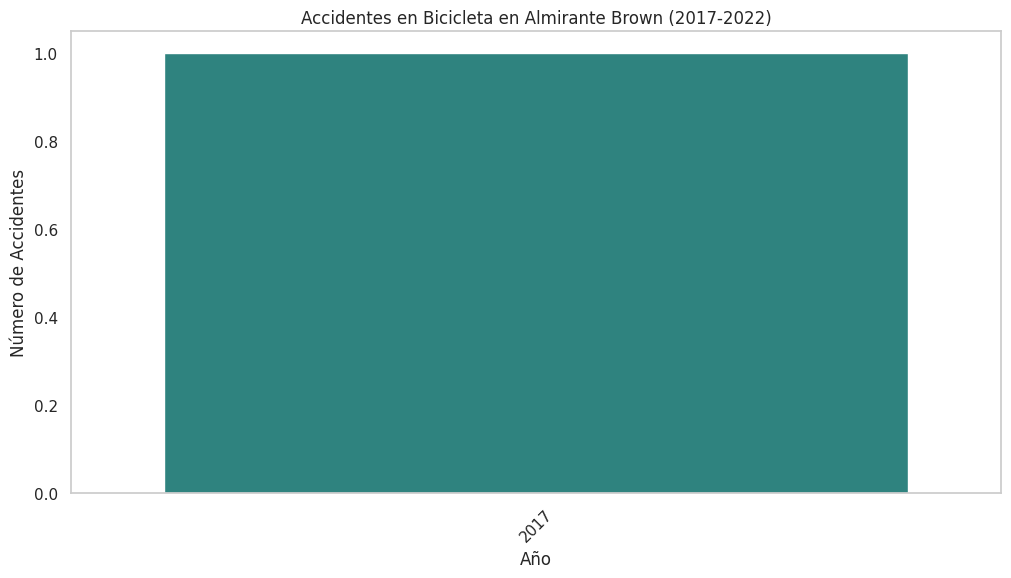

In [109]:
# Contar accidentes por año
accidentes_por_anio = almirante_brown_df['anio'].value_counts().sort_index()

# Gráfico: Cantidad de accidentes en bicicleta en Almirante Brown por año
plt.figure(figsize=(12, 6))
sns.barplot(x=accidentes_por_anio.index, y=accidentes_por_anio.values, palette='viridis')
plt.title('Accidentes en Bicicleta en Almirante Brown (2017-2022)')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-110-a95b68954f83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  almirante_brown_df['mes'] = almirante_brown_df['fecha_hecho'].str.split('-').str[1].astype(int)
<ipython-input-110-a95b68954f83>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_mes.index, y=accidentes_por_mes.values, palette='rocket')


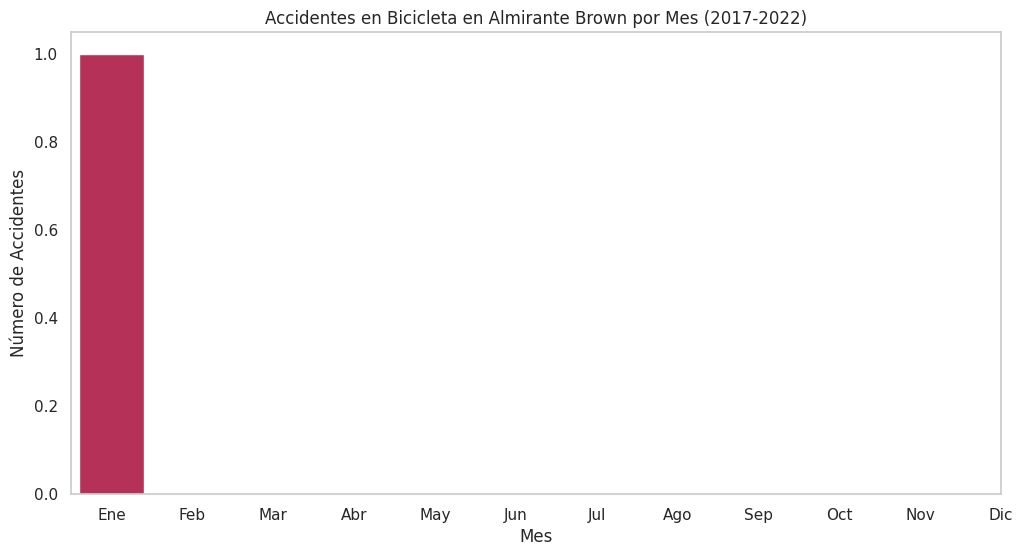

In [110]:
# Análisis mensual de accidentes en bicicleta en Almirante Brown
almirante_brown_df['mes'] = almirante_brown_df['fecha_hecho'].str.split('-').str[1].astype(int)
accidentes_por_mes = almirante_brown_df['mes'].value_counts().sort_index()

# Gráfico: Cantidad de accidentes por mes
plt.figure(figsize=(12, 6))
sns.barplot(x=accidentes_por_mes.index, y=accidentes_por_mes.values, palette='rocket')
plt.title('Accidentes en Bicicleta en Almirante Brown por Mes (2017-2022)')
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y')
plt.show()

<ipython-input-111-eac202e048b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero_victimas.index, y=genero_victimas.values, palette='magma')


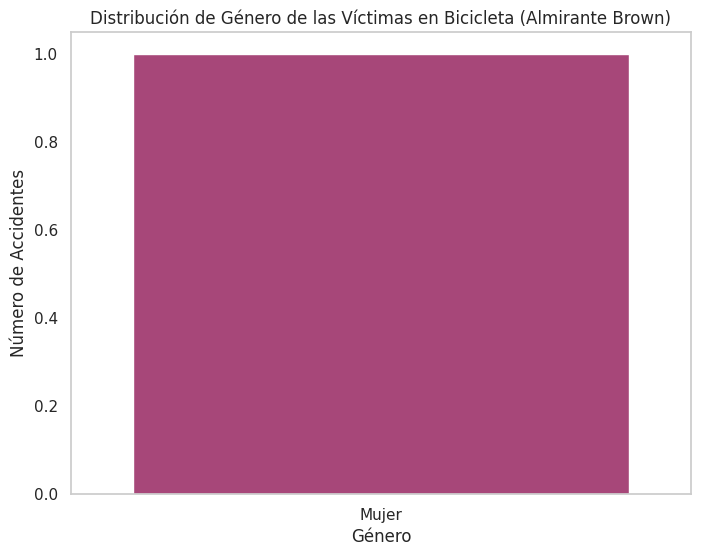

In [111]:
# Distribución por Género de las Víctimas
genero_victimas = almirante_brown_df['victima_identidad_genero'].value_counts()

# Gráfico: Distribución por género de las víctimas
plt.figure(figsize=(8, 6))
sns.barplot(x=genero_victimas.index, y=genero_victimas.values, palette='magma')
plt.title('Distribución de Género de las Víctimas en Bicicleta (Almirante Brown)')
plt.xlabel('Género')
plt.ylabel('Número de Accidentes')
plt.grid(axis='y')
plt.show()

<ipython-input-112-9276f0101cab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehiculo_inculpado.index, y=vehiculo_inculpado.values, palette='coolwarm')


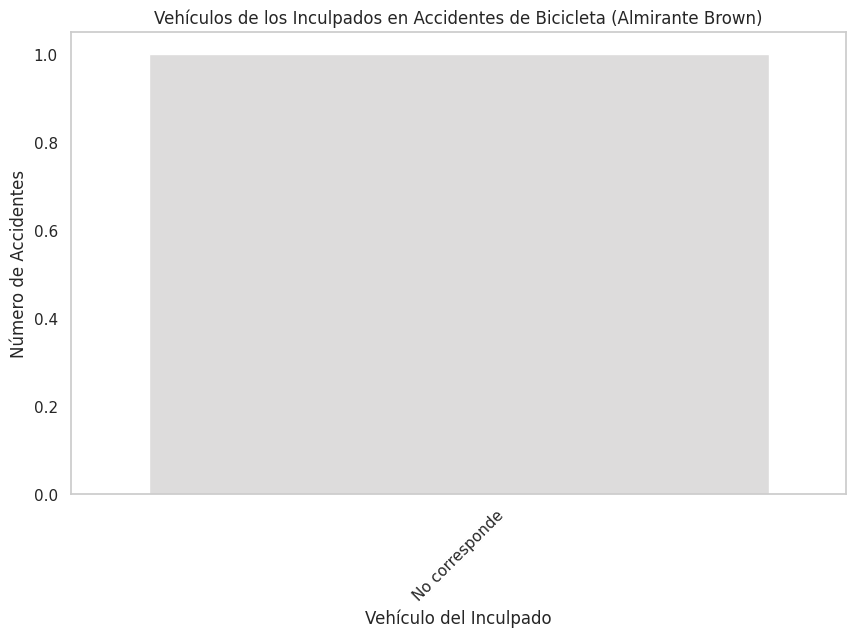

In [112]:
# Accidentes por Tipo de Vehículo del Inculpado
vehiculo_inculpado = almirante_brown_df['inculpado_vehiculo_ampliado'].value_counts().head(10)

# Gráfico: Accidentes por tipo de vehículo del inculpado
plt.figure(figsize=(10, 6))
sns.barplot(x=vehiculo_inculpado.index, y=vehiculo_inculpado.values, palette='coolwarm')
plt.title('Vehículos de los Inculpados en Accidentes de Bicicleta (Almirante Brown)')
plt.xlabel('Vehículo del Inculpado')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-113-31f2c35ac39d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  almirante_brown_df['hora'] = almirante_brown_df['hora_hecho'].str.split(':').str[0].astype(int)


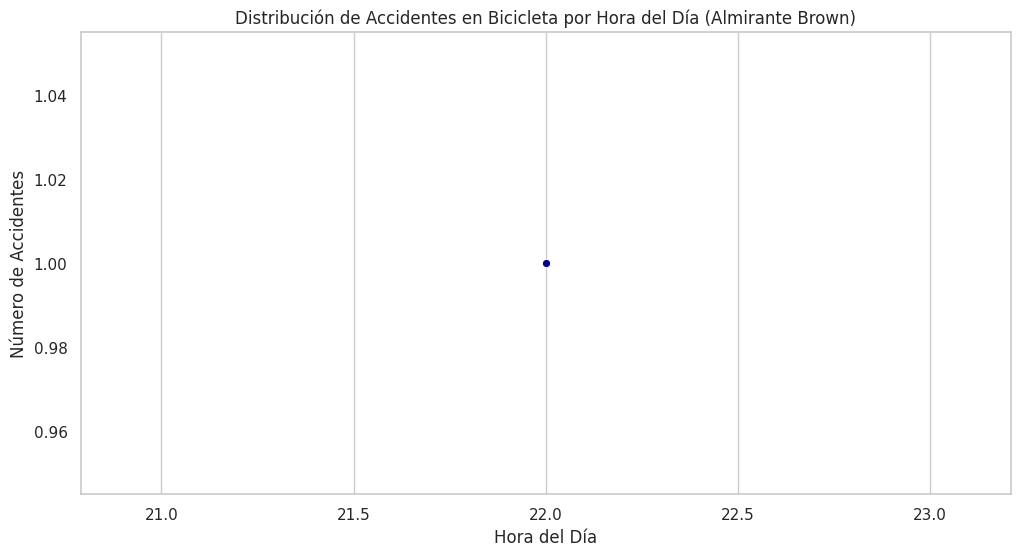

In [113]:
# Distribución por Hora del Día
almirante_brown_df['hora'] = almirante_brown_df['hora_hecho'].str.split(':').str[0].astype(int)
accidentes_por_hora = almirante_brown_df['hora'].value_counts().sort_index()

# Gráfico: Distribución por hora del día
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, marker='o', color='darkblue')
plt.title('Distribución de Accidentes en Bicicleta por Hora del Día (Almirante Brown)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.grid(axis='y')
plt.show()

<ipython-input-114-4a66f64ff6d9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clima_accidentes.index, y=clima_accidentes.values, palette='plasma')


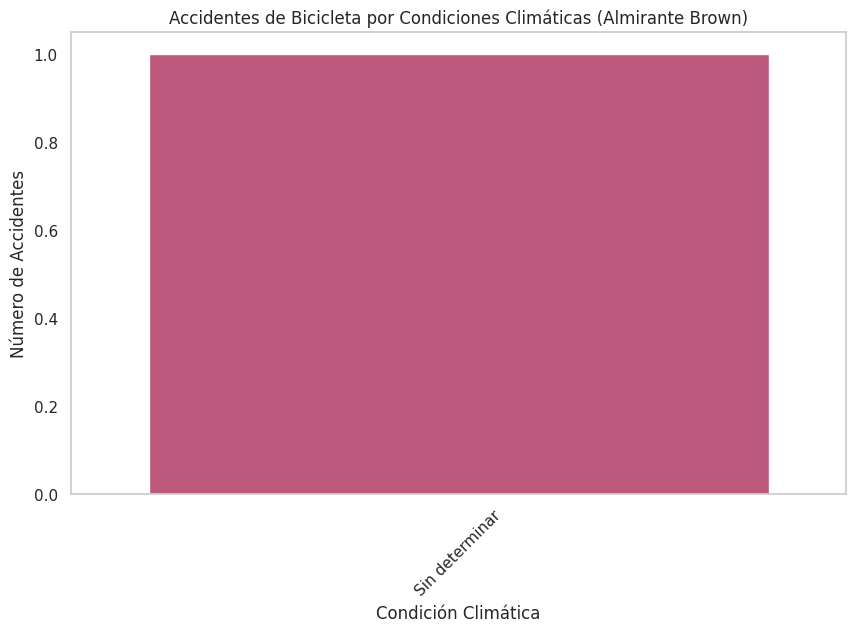

In [114]:
# Relación entre el Clima y los Accidentes
clima_accidentes = almirante_brown_df['clima_condicion'].value_counts().head(10)

# Gráfico: Accidentes por condiciones climáticas
plt.figure(figsize=(10, 6))
sns.barplot(x=clima_accidentes.index, y=clima_accidentes.values, palette='plasma')
plt.title('Accidentes de Bicicleta por Condiciones Climáticas (Almirante Brown)')
plt.xlabel('Condición Climática')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()